In [2]:
# Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
from data_prep import data_prep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from data_prep import data_prep
from tqdm import tqdm

# read data
x_train, y_train, x_test, y_test = data_prep()

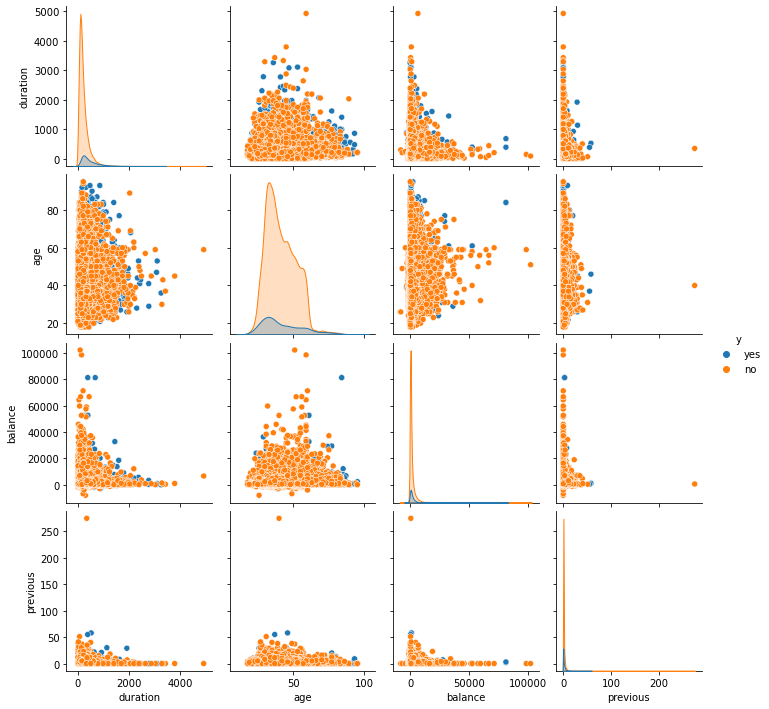

In [54]:
# draw pairplot of several important features
train_df = pd.read_table('traininingdata.txt')
a=train_df[["duration","age","balance","previous","y"]]
sns.pairplot(a,hue="y")

In [62]:
# Grid Search cross validation 
params = [{'max_depth': list(range(2,30)),
           'class_weight': ['balanced', None],
           'min_samples_split': list(range(2, 10))}]

DT = GridSearchCV(DecisionTreeClassifier(),
                   param_grid = params,
                   scoring = 'f1',
                   verbose=10,
                   cv = 10)

DT.fit(x_train, y_train)
y_test_pred = DT.predict(x_test)
print("f1: ",f1_score(y_test_pred, y_test))
print("accuracy: ",accuracy_score(y_test_pred, y_test))
print("best parameters: ",DT.best_params_)

Fitting 10 folds for each of 448 candidates, totalling 4480 fits
[CV 1/10; 1/448] START class_weight=balanced, max_depth=2, min_samples_split=2..
[CV 1/10; 1/448] END class_weight=balanced, max_depth=2, min_samples_split=2;, score=0.325 total time=   0.0s
[CV 2/10; 1/448] START class_weight=balanced, max_depth=2, min_samples_split=2..
[CV 2/10; 1/448] END class_weight=balanced, max_depth=2, min_samples_split=2;, score=0.269 total time=   0.0s
[CV 3/10; 1/448] START class_weight=balanced, max_depth=2, min_samples_split=2..
[CV 3/10; 1/448] END class_weight=balanced, max_depth=2, min_samples_split=2;, score=0.314 total time=   0.0s
[CV 4/10; 1/448] START class_weight=balanced, max_depth=2, min_samples_split=2..
[CV 4/10; 1/448] END class_weight=balanced, max_depth=2, min_samples_split=2;, score=0.365 total time=   0.0s
[CV 5/10; 1/448] START class_weight=balanced, max_depth=2, min_samples_split=2..
[CV 5/10; 1/448] END class_weight=balanced, max_depth=2, min_samples_split=2;, score=0.398

[CV 5/10; 5/448] END class_weight=balanced, max_depth=2, min_samples_split=6;, score=0.398 total time=   0.0s
[CV 6/10; 5/448] START class_weight=balanced, max_depth=2, min_samples_split=6..
[CV 6/10; 5/448] END class_weight=balanced, max_depth=2, min_samples_split=6;, score=0.335 total time=   0.0s
[CV 7/10; 5/448] START class_weight=balanced, max_depth=2, min_samples_split=6..
[CV 7/10; 5/448] END class_weight=balanced, max_depth=2, min_samples_split=6;, score=0.332 total time=   0.0s
[CV 8/10; 5/448] START class_weight=balanced, max_depth=2, min_samples_split=6..
[CV 8/10; 5/448] END class_weight=balanced, max_depth=2, min_samples_split=6;, score=0.293 total time=   0.0s
[CV 9/10; 5/448] START class_weight=balanced, max_depth=2, min_samples_split=6..
[CV 9/10; 5/448] END class_weight=balanced, max_depth=2, min_samples_split=6;, score=0.275 total time=   0.0s
[CV 10/10; 5/448] START class_weight=balanced, max_depth=2, min_samples_split=6.
[CV 10/10; 5/448] END class_weight=balanced, 

[CV 9/10; 9/448] END class_weight=balanced, max_depth=3, min_samples_split=2;, score=0.334 total time=   0.0s
[CV 10/10; 9/448] START class_weight=balanced, max_depth=3, min_samples_split=2.
[CV 10/10; 9/448] END class_weight=balanced, max_depth=3, min_samples_split=2;, score=0.338 total time=   0.0s
[CV 1/10; 10/448] START class_weight=balanced, max_depth=3, min_samples_split=3.
[CV 1/10; 10/448] END class_weight=balanced, max_depth=3, min_samples_split=3;, score=0.530 total time=   0.0s
[CV 2/10; 10/448] START class_weight=balanced, max_depth=3, min_samples_split=3.
[CV 2/10; 10/448] END class_weight=balanced, max_depth=3, min_samples_split=3;, score=0.298 total time=   0.0s
[CV 3/10; 10/448] START class_weight=balanced, max_depth=3, min_samples_split=3.
[CV 3/10; 10/448] END class_weight=balanced, max_depth=3, min_samples_split=3;, score=0.401 total time=   0.0s
[CV 4/10; 10/448] START class_weight=balanced, max_depth=3, min_samples_split=3.
[CV 4/10; 10/448] END class_weight=balanc

[CV 5/10; 14/448] END class_weight=balanced, max_depth=3, min_samples_split=7;, score=0.330 total time=   0.0s
[CV 6/10; 14/448] START class_weight=balanced, max_depth=3, min_samples_split=7.
[CV 6/10; 14/448] END class_weight=balanced, max_depth=3, min_samples_split=7;, score=0.335 total time=   0.0s
[CV 7/10; 14/448] START class_weight=balanced, max_depth=3, min_samples_split=7.
[CV 7/10; 14/448] END class_weight=balanced, max_depth=3, min_samples_split=7;, score=0.207 total time=   0.0s
[CV 8/10; 14/448] START class_weight=balanced, max_depth=3, min_samples_split=7.
[CV 8/10; 14/448] END class_weight=balanced, max_depth=3, min_samples_split=7;, score=0.232 total time=   0.0s
[CV 9/10; 14/448] START class_weight=balanced, max_depth=3, min_samples_split=7.
[CV 9/10; 14/448] END class_weight=balanced, max_depth=3, min_samples_split=7;, score=0.334 total time=   0.0s
[CV 10/10; 14/448] START class_weight=balanced, max_depth=3, min_samples_split=7
[CV 10/10; 14/448] END class_weight=bala

[CV 9/10; 18/448] END class_weight=balanced, max_depth=4, min_samples_split=3;, score=0.327 total time=   0.0s
[CV 10/10; 18/448] START class_weight=balanced, max_depth=4, min_samples_split=3
[CV 10/10; 18/448] END class_weight=balanced, max_depth=4, min_samples_split=3;, score=0.339 total time=   0.0s
[CV 1/10; 19/448] START class_weight=balanced, max_depth=4, min_samples_split=4.
[CV 1/10; 19/448] END class_weight=balanced, max_depth=4, min_samples_split=4;, score=0.393 total time=   0.0s
[CV 2/10; 19/448] START class_weight=balanced, max_depth=4, min_samples_split=4.
[CV 2/10; 19/448] END class_weight=balanced, max_depth=4, min_samples_split=4;, score=0.319 total time=   0.0s
[CV 3/10; 19/448] START class_weight=balanced, max_depth=4, min_samples_split=4.
[CV 3/10; 19/448] END class_weight=balanced, max_depth=4, min_samples_split=4;, score=0.401 total time=   0.0s
[CV 4/10; 19/448] START class_weight=balanced, max_depth=4, min_samples_split=4.
[CV 4/10; 19/448] END class_weight=bala

[CV 3/10; 23/448] END class_weight=balanced, max_depth=4, min_samples_split=8;, score=0.401 total time=   0.0s
[CV 4/10; 23/448] START class_weight=balanced, max_depth=4, min_samples_split=8.
[CV 4/10; 23/448] END class_weight=balanced, max_depth=4, min_samples_split=8;, score=0.296 total time=   0.0s
[CV 5/10; 23/448] START class_weight=balanced, max_depth=4, min_samples_split=8.
[CV 5/10; 23/448] END class_weight=balanced, max_depth=4, min_samples_split=8;, score=0.341 total time=   0.0s
[CV 6/10; 23/448] START class_weight=balanced, max_depth=4, min_samples_split=8.
[CV 6/10; 23/448] END class_weight=balanced, max_depth=4, min_samples_split=8;, score=0.204 total time=   0.0s
[CV 7/10; 23/448] START class_weight=balanced, max_depth=4, min_samples_split=8.
[CV 7/10; 23/448] END class_weight=balanced, max_depth=4, min_samples_split=8;, score=0.189 total time=   0.0s
[CV 8/10; 23/448] START class_weight=balanced, max_depth=4, min_samples_split=8.
[CV 8/10; 23/448] END class_weight=balan

[CV 8/10; 27/448] END class_weight=balanced, max_depth=5, min_samples_split=4;, score=0.242 total time=   0.0s
[CV 9/10; 27/448] START class_weight=balanced, max_depth=5, min_samples_split=4.
[CV 9/10; 27/448] END class_weight=balanced, max_depth=5, min_samples_split=4;, score=0.326 total time=   0.0s
[CV 10/10; 27/448] START class_weight=balanced, max_depth=5, min_samples_split=4
[CV 10/10; 27/448] END class_weight=balanced, max_depth=5, min_samples_split=4;, score=0.315 total time=   0.0s
[CV 1/10; 28/448] START class_weight=balanced, max_depth=5, min_samples_split=5.
[CV 1/10; 28/448] END class_weight=balanced, max_depth=5, min_samples_split=5;, score=0.233 total time=   0.0s
[CV 2/10; 28/448] START class_weight=balanced, max_depth=5, min_samples_split=5.
[CV 2/10; 28/448] END class_weight=balanced, max_depth=5, min_samples_split=5;, score=0.475 total time=   0.0s
[CV 3/10; 28/448] START class_weight=balanced, max_depth=5, min_samples_split=5.
[CV 3/10; 28/448] END class_weight=bala

[CV 2/10; 32/448] END class_weight=balanced, max_depth=5, min_samples_split=9;, score=0.475 total time=   0.0s
[CV 3/10; 32/448] START class_weight=balanced, max_depth=5, min_samples_split=9.
[CV 3/10; 32/448] END class_weight=balanced, max_depth=5, min_samples_split=9;, score=0.401 total time=   0.0s
[CV 4/10; 32/448] START class_weight=balanced, max_depth=5, min_samples_split=9.
[CV 4/10; 32/448] END class_weight=balanced, max_depth=5, min_samples_split=9;, score=0.306 total time=   0.0s
[CV 5/10; 32/448] START class_weight=balanced, max_depth=5, min_samples_split=9.
[CV 5/10; 32/448] END class_weight=balanced, max_depth=5, min_samples_split=9;, score=0.345 total time=   0.0s
[CV 6/10; 32/448] START class_weight=balanced, max_depth=5, min_samples_split=9.
[CV 6/10; 32/448] END class_weight=balanced, max_depth=5, min_samples_split=9;, score=0.261 total time=   0.0s
[CV 7/10; 32/448] START class_weight=balanced, max_depth=5, min_samples_split=9.
[CV 7/10; 32/448] END class_weight=balan

[CV 6/10; 36/448] END class_weight=balanced, max_depth=6, min_samples_split=5;, score=0.337 total time=   0.0s
[CV 7/10; 36/448] START class_weight=balanced, max_depth=6, min_samples_split=5.
[CV 7/10; 36/448] END class_weight=balanced, max_depth=6, min_samples_split=5;, score=0.198 total time=   0.0s
[CV 8/10; 36/448] START class_weight=balanced, max_depth=6, min_samples_split=5.
[CV 8/10; 36/448] END class_weight=balanced, max_depth=6, min_samples_split=5;, score=0.347 total time=   0.0s
[CV 9/10; 36/448] START class_weight=balanced, max_depth=6, min_samples_split=5.
[CV 9/10; 36/448] END class_weight=balanced, max_depth=6, min_samples_split=5;, score=0.528 total time=   0.0s
[CV 10/10; 36/448] START class_weight=balanced, max_depth=6, min_samples_split=5
[CV 10/10; 36/448] END class_weight=balanced, max_depth=6, min_samples_split=5;, score=0.293 total time=   0.0s
[CV 1/10; 37/448] START class_weight=balanced, max_depth=6, min_samples_split=6.
[CV 1/10; 37/448] END class_weight=bala

[CV 1/10; 41/448] END class_weight=balanced, max_depth=7, min_samples_split=2;, score=0.096 total time=   0.0s
[CV 2/10; 41/448] START class_weight=balanced, max_depth=7, min_samples_split=2.
[CV 2/10; 41/448] END class_weight=balanced, max_depth=7, min_samples_split=2;, score=0.407 total time=   0.0s
[CV 3/10; 41/448] START class_weight=balanced, max_depth=7, min_samples_split=2.
[CV 3/10; 41/448] END class_weight=balanced, max_depth=7, min_samples_split=2;, score=0.383 total time=   0.0s
[CV 4/10; 41/448] START class_weight=balanced, max_depth=7, min_samples_split=2.
[CV 4/10; 41/448] END class_weight=balanced, max_depth=7, min_samples_split=2;, score=0.082 total time=   0.0s
[CV 5/10; 41/448] START class_weight=balanced, max_depth=7, min_samples_split=2.
[CV 5/10; 41/448] END class_weight=balanced, max_depth=7, min_samples_split=2;, score=0.479 total time=   0.0s
[CV 6/10; 41/448] START class_weight=balanced, max_depth=7, min_samples_split=2.
[CV 6/10; 41/448] END class_weight=balan

[CV 5/10; 45/448] END class_weight=balanced, max_depth=7, min_samples_split=6;, score=0.479 total time=   0.0s
[CV 6/10; 45/448] START class_weight=balanced, max_depth=7, min_samples_split=6.
[CV 6/10; 45/448] END class_weight=balanced, max_depth=7, min_samples_split=6;, score=0.288 total time=   0.0s
[CV 7/10; 45/448] START class_weight=balanced, max_depth=7, min_samples_split=6.
[CV 7/10; 45/448] END class_weight=balanced, max_depth=7, min_samples_split=6;, score=0.205 total time=   0.0s
[CV 8/10; 45/448] START class_weight=balanced, max_depth=7, min_samples_split=6.
[CV 8/10; 45/448] END class_weight=balanced, max_depth=7, min_samples_split=6;, score=0.287 total time=   0.0s
[CV 9/10; 45/448] START class_weight=balanced, max_depth=7, min_samples_split=6.
[CV 9/10; 45/448] END class_weight=balanced, max_depth=7, min_samples_split=6;, score=0.299 total time=   0.0s
[CV 10/10; 45/448] START class_weight=balanced, max_depth=7, min_samples_split=6
[CV 10/10; 45/448] END class_weight=bala

[CV 9/10; 49/448] END class_weight=balanced, max_depth=8, min_samples_split=2;, score=0.305 total time=   0.0s
[CV 10/10; 49/448] START class_weight=balanced, max_depth=8, min_samples_split=2
[CV 10/10; 49/448] END class_weight=balanced, max_depth=8, min_samples_split=2;, score=0.289 total time=   0.0s
[CV 1/10; 50/448] START class_weight=balanced, max_depth=8, min_samples_split=3.
[CV 1/10; 50/448] END class_weight=balanced, max_depth=8, min_samples_split=3;, score=0.112 total time=   0.0s
[CV 2/10; 50/448] START class_weight=balanced, max_depth=8, min_samples_split=3.
[CV 2/10; 50/448] END class_weight=balanced, max_depth=8, min_samples_split=3;, score=0.338 total time=   0.0s
[CV 3/10; 50/448] START class_weight=balanced, max_depth=8, min_samples_split=3.
[CV 3/10; 50/448] END class_weight=balanced, max_depth=8, min_samples_split=3;, score=0.297 total time=   0.0s
[CV 4/10; 50/448] START class_weight=balanced, max_depth=8, min_samples_split=3.
[CV 4/10; 50/448] END class_weight=bala

[CV 3/10; 54/448] END class_weight=balanced, max_depth=8, min_samples_split=7;, score=0.297 total time=   0.0s
[CV 4/10; 54/448] START class_weight=balanced, max_depth=8, min_samples_split=7.
[CV 4/10; 54/448] END class_weight=balanced, max_depth=8, min_samples_split=7;, score=0.085 total time=   0.0s
[CV 5/10; 54/448] START class_weight=balanced, max_depth=8, min_samples_split=7.
[CV 5/10; 54/448] END class_weight=balanced, max_depth=8, min_samples_split=7;, score=0.478 total time=   0.0s
[CV 6/10; 54/448] START class_weight=balanced, max_depth=8, min_samples_split=7.
[CV 6/10; 54/448] END class_weight=balanced, max_depth=8, min_samples_split=7;, score=0.278 total time=   0.0s
[CV 7/10; 54/448] START class_weight=balanced, max_depth=8, min_samples_split=7.
[CV 7/10; 54/448] END class_weight=balanced, max_depth=8, min_samples_split=7;, score=0.152 total time=   0.0s
[CV 8/10; 54/448] START class_weight=balanced, max_depth=8, min_samples_split=7.
[CV 8/10; 54/448] END class_weight=balan

[CV 7/10; 58/448] END class_weight=balanced, max_depth=9, min_samples_split=3;, score=0.133 total time=   0.0s
[CV 8/10; 58/448] START class_weight=balanced, max_depth=9, min_samples_split=3.
[CV 8/10; 58/448] END class_weight=balanced, max_depth=9, min_samples_split=3;, score=0.253 total time=   0.0s
[CV 9/10; 58/448] START class_weight=balanced, max_depth=9, min_samples_split=3.
[CV 9/10; 58/448] END class_weight=balanced, max_depth=9, min_samples_split=3;, score=0.273 total time=   0.0s
[CV 10/10; 58/448] START class_weight=balanced, max_depth=9, min_samples_split=3
[CV 10/10; 58/448] END class_weight=balanced, max_depth=9, min_samples_split=3;, score=0.278 total time=   0.0s
[CV 1/10; 59/448] START class_weight=balanced, max_depth=9, min_samples_split=4.
[CV 1/10; 59/448] END class_weight=balanced, max_depth=9, min_samples_split=4;, score=0.136 total time=   0.0s
[CV 2/10; 59/448] START class_weight=balanced, max_depth=9, min_samples_split=4.
[CV 2/10; 59/448] END class_weight=bala

[CV 1/10; 63/448] END class_weight=balanced, max_depth=9, min_samples_split=8;, score=0.136 total time=   0.0s
[CV 2/10; 63/448] START class_weight=balanced, max_depth=9, min_samples_split=8.
[CV 2/10; 63/448] END class_weight=balanced, max_depth=9, min_samples_split=8;, score=0.347 total time=   0.0s
[CV 3/10; 63/448] START class_weight=balanced, max_depth=9, min_samples_split=8.
[CV 3/10; 63/448] END class_weight=balanced, max_depth=9, min_samples_split=8;, score=0.440 total time=   0.0s
[CV 4/10; 63/448] START class_weight=balanced, max_depth=9, min_samples_split=8.
[CV 4/10; 63/448] END class_weight=balanced, max_depth=9, min_samples_split=8;, score=0.090 total time=   0.0s
[CV 5/10; 63/448] START class_weight=balanced, max_depth=9, min_samples_split=8.
[CV 5/10; 63/448] END class_weight=balanced, max_depth=9, min_samples_split=8;, score=0.355 total time=   0.0s
[CV 6/10; 63/448] START class_weight=balanced, max_depth=9, min_samples_split=8.
[CV 6/10; 63/448] END class_weight=balan

[CV 5/10; 67/448] END class_weight=balanced, max_depth=10, min_samples_split=4;, score=0.347 total time=   0.0s
[CV 6/10; 67/448] START class_weight=balanced, max_depth=10, min_samples_split=4
[CV 6/10; 67/448] END class_weight=balanced, max_depth=10, min_samples_split=4;, score=0.268 total time=   0.0s
[CV 7/10; 67/448] START class_weight=balanced, max_depth=10, min_samples_split=4
[CV 7/10; 67/448] END class_weight=balanced, max_depth=10, min_samples_split=4;, score=0.128 total time=   0.1s
[CV 8/10; 67/448] START class_weight=balanced, max_depth=10, min_samples_split=4
[CV 8/10; 67/448] END class_weight=balanced, max_depth=10, min_samples_split=4;, score=0.238 total time=   0.0s
[CV 9/10; 67/448] START class_weight=balanced, max_depth=10, min_samples_split=4
[CV 9/10; 67/448] END class_weight=balanced, max_depth=10, min_samples_split=4;, score=0.268 total time=   0.0s
[CV 10/10; 67/448] START class_weight=balanced, max_depth=10, min_samples_split=4
[CV 10/10; 67/448] END class_weigh

[CV 9/10; 71/448] END class_weight=balanced, max_depth=10, min_samples_split=8;, score=0.280 total time=   0.0s
[CV 10/10; 71/448] START class_weight=balanced, max_depth=10, min_samples_split=8
[CV 10/10; 71/448] END class_weight=balanced, max_depth=10, min_samples_split=8;, score=0.268 total time=   0.0s
[CV 1/10; 72/448] START class_weight=balanced, max_depth=10, min_samples_split=9
[CV 1/10; 72/448] END class_weight=balanced, max_depth=10, min_samples_split=9;, score=0.128 total time=   0.0s
[CV 2/10; 72/448] START class_weight=balanced, max_depth=10, min_samples_split=9
[CV 2/10; 72/448] END class_weight=balanced, max_depth=10, min_samples_split=9;, score=0.380 total time=   0.0s
[CV 3/10; 72/448] START class_weight=balanced, max_depth=10, min_samples_split=9
[CV 3/10; 72/448] END class_weight=balanced, max_depth=10, min_samples_split=9;, score=0.383 total time=   0.0s
[CV 4/10; 72/448] START class_weight=balanced, max_depth=10, min_samples_split=9
[CV 4/10; 72/448] END class_weigh

[CV 3/10; 76/448] END class_weight=balanced, max_depth=11, min_samples_split=5;, score=0.341 total time=   0.1s
[CV 4/10; 76/448] START class_weight=balanced, max_depth=11, min_samples_split=5
[CV 4/10; 76/448] END class_weight=balanced, max_depth=11, min_samples_split=5;, score=0.084 total time=   0.1s
[CV 5/10; 76/448] START class_weight=balanced, max_depth=11, min_samples_split=5
[CV 5/10; 76/448] END class_weight=balanced, max_depth=11, min_samples_split=5;, score=0.356 total time=   0.1s
[CV 6/10; 76/448] START class_weight=balanced, max_depth=11, min_samples_split=5
[CV 6/10; 76/448] END class_weight=balanced, max_depth=11, min_samples_split=5;, score=0.256 total time=   0.0s
[CV 7/10; 76/448] START class_weight=balanced, max_depth=11, min_samples_split=5
[CV 7/10; 76/448] END class_weight=balanced, max_depth=11, min_samples_split=5;, score=0.117 total time=   0.1s
[CV 8/10; 76/448] START class_weight=balanced, max_depth=11, min_samples_split=5
[CV 8/10; 76/448] END class_weight=

[CV 7/10; 80/448] END class_weight=balanced, max_depth=11, min_samples_split=9;, score=0.123 total time=   0.1s
[CV 8/10; 80/448] START class_weight=balanced, max_depth=11, min_samples_split=9
[CV 8/10; 80/448] END class_weight=balanced, max_depth=11, min_samples_split=9;, score=0.274 total time=   0.1s
[CV 9/10; 80/448] START class_weight=balanced, max_depth=11, min_samples_split=9
[CV 9/10; 80/448] END class_weight=balanced, max_depth=11, min_samples_split=9;, score=0.269 total time=   0.1s
[CV 10/10; 80/448] START class_weight=balanced, max_depth=11, min_samples_split=9
[CV 10/10; 80/448] END class_weight=balanced, max_depth=11, min_samples_split=9;, score=0.267 total time=   0.1s
[CV 1/10; 81/448] START class_weight=balanced, max_depth=12, min_samples_split=2
[CV 1/10; 81/448] END class_weight=balanced, max_depth=12, min_samples_split=2;, score=0.140 total time=   0.1s
[CV 2/10; 81/448] START class_weight=balanced, max_depth=12, min_samples_split=2
[CV 2/10; 81/448] END class_weigh

[CV 1/10; 85/448] END class_weight=balanced, max_depth=12, min_samples_split=6;, score=0.114 total time=   0.1s
[CV 2/10; 85/448] START class_weight=balanced, max_depth=12, min_samples_split=6
[CV 2/10; 85/448] END class_weight=balanced, max_depth=12, min_samples_split=6;, score=0.377 total time=   0.1s
[CV 3/10; 85/448] START class_weight=balanced, max_depth=12, min_samples_split=6
[CV 3/10; 85/448] END class_weight=balanced, max_depth=12, min_samples_split=6;, score=0.361 total time=   0.1s
[CV 4/10; 85/448] START class_weight=balanced, max_depth=12, min_samples_split=6
[CV 4/10; 85/448] END class_weight=balanced, max_depth=12, min_samples_split=6;, score=0.082 total time=   0.1s
[CV 5/10; 85/448] START class_weight=balanced, max_depth=12, min_samples_split=6
[CV 5/10; 85/448] END class_weight=balanced, max_depth=12, min_samples_split=6;, score=0.346 total time=   0.1s
[CV 6/10; 85/448] START class_weight=balanced, max_depth=12, min_samples_split=6
[CV 6/10; 85/448] END class_weight=

[CV 5/10; 89/448] END class_weight=balanced, max_depth=13, min_samples_split=2;, score=0.329 total time=   0.1s
[CV 6/10; 89/448] START class_weight=balanced, max_depth=13, min_samples_split=2
[CV 6/10; 89/448] END class_weight=balanced, max_depth=13, min_samples_split=2;, score=0.249 total time=   0.1s
[CV 7/10; 89/448] START class_weight=balanced, max_depth=13, min_samples_split=2
[CV 7/10; 89/448] END class_weight=balanced, max_depth=13, min_samples_split=2;, score=0.114 total time=   0.1s
[CV 8/10; 89/448] START class_weight=balanced, max_depth=13, min_samples_split=2
[CV 8/10; 89/448] END class_weight=balanced, max_depth=13, min_samples_split=2;, score=0.224 total time=   0.1s
[CV 9/10; 89/448] START class_weight=balanced, max_depth=13, min_samples_split=2
[CV 9/10; 89/448] END class_weight=balanced, max_depth=13, min_samples_split=2;, score=0.236 total time=   0.1s
[CV 10/10; 89/448] START class_weight=balanced, max_depth=13, min_samples_split=2
[CV 10/10; 89/448] END class_weigh

[CV 9/10; 93/448] END class_weight=balanced, max_depth=13, min_samples_split=6;, score=0.251 total time=   0.1s
[CV 10/10; 93/448] START class_weight=balanced, max_depth=13, min_samples_split=6
[CV 10/10; 93/448] END class_weight=balanced, max_depth=13, min_samples_split=6;, score=0.261 total time=   0.1s
[CV 1/10; 94/448] START class_weight=balanced, max_depth=13, min_samples_split=7
[CV 1/10; 94/448] END class_weight=balanced, max_depth=13, min_samples_split=7;, score=0.096 total time=   0.1s
[CV 2/10; 94/448] START class_weight=balanced, max_depth=13, min_samples_split=7
[CV 2/10; 94/448] END class_weight=balanced, max_depth=13, min_samples_split=7;, score=0.350 total time=   0.1s
[CV 3/10; 94/448] START class_weight=balanced, max_depth=13, min_samples_split=7
[CV 3/10; 94/448] END class_weight=balanced, max_depth=13, min_samples_split=7;, score=0.376 total time=   0.1s
[CV 4/10; 94/448] START class_weight=balanced, max_depth=13, min_samples_split=7
[CV 4/10; 94/448] END class_weigh

[CV 2/10; 98/448] END class_weight=balanced, max_depth=14, min_samples_split=3;, score=0.352 total time=   0.1s
[CV 3/10; 98/448] START class_weight=balanced, max_depth=14, min_samples_split=3
[CV 3/10; 98/448] END class_weight=balanced, max_depth=14, min_samples_split=3;, score=0.358 total time=   0.1s
[CV 4/10; 98/448] START class_weight=balanced, max_depth=14, min_samples_split=3
[CV 4/10; 98/448] END class_weight=balanced, max_depth=14, min_samples_split=3;, score=0.062 total time=   0.1s
[CV 5/10; 98/448] START class_weight=balanced, max_depth=14, min_samples_split=3
[CV 5/10; 98/448] END class_weight=balanced, max_depth=14, min_samples_split=3;, score=0.259 total time=   0.1s
[CV 6/10; 98/448] START class_weight=balanced, max_depth=14, min_samples_split=3
[CV 6/10; 98/448] END class_weight=balanced, max_depth=14, min_samples_split=3;, score=0.232 total time=   0.1s
[CV 7/10; 98/448] START class_weight=balanced, max_depth=14, min_samples_split=3
[CV 7/10; 98/448] END class_weight=

[CV 6/10; 102/448] END class_weight=balanced, max_depth=14, min_samples_split=7;, score=0.237 total time=   0.1s
[CV 7/10; 102/448] START class_weight=balanced, max_depth=14, min_samples_split=7
[CV 7/10; 102/448] END class_weight=balanced, max_depth=14, min_samples_split=7;, score=0.116 total time=   0.1s
[CV 8/10; 102/448] START class_weight=balanced, max_depth=14, min_samples_split=7
[CV 8/10; 102/448] END class_weight=balanced, max_depth=14, min_samples_split=7;, score=0.240 total time=   0.1s
[CV 9/10; 102/448] START class_weight=balanced, max_depth=14, min_samples_split=7
[CV 9/10; 102/448] END class_weight=balanced, max_depth=14, min_samples_split=7;, score=0.228 total time=   0.1s
[CV 10/10; 102/448] START class_weight=balanced, max_depth=14, min_samples_split=7
[CV 10/10; 102/448] END class_weight=balanced, max_depth=14, min_samples_split=7;, score=0.260 total time=   0.1s
[CV 1/10; 103/448] START class_weight=balanced, max_depth=14, min_samples_split=8
[CV 1/10; 103/448] END 

[CV 9/10; 106/448] END class_weight=balanced, max_depth=15, min_samples_split=3;, score=0.209 total time=   0.1s
[CV 10/10; 106/448] START class_weight=balanced, max_depth=15, min_samples_split=3
[CV 10/10; 106/448] END class_weight=balanced, max_depth=15, min_samples_split=3;, score=0.264 total time=   0.1s
[CV 1/10; 107/448] START class_weight=balanced, max_depth=15, min_samples_split=4
[CV 1/10; 107/448] END class_weight=balanced, max_depth=15, min_samples_split=4;, score=0.065 total time=   0.1s
[CV 2/10; 107/448] START class_weight=balanced, max_depth=15, min_samples_split=4
[CV 2/10; 107/448] END class_weight=balanced, max_depth=15, min_samples_split=4;, score=0.316 total time=   0.1s
[CV 3/10; 107/448] START class_weight=balanced, max_depth=15, min_samples_split=4
[CV 3/10; 107/448] END class_weight=balanced, max_depth=15, min_samples_split=4;, score=0.264 total time=   0.1s
[CV 4/10; 107/448] START class_weight=balanced, max_depth=15, min_samples_split=4
[CV 4/10; 107/448] END 

[CV 1/10; 111/448] END class_weight=balanced, max_depth=15, min_samples_split=8;, score=0.064 total time=   0.1s
[CV 2/10; 111/448] START class_weight=balanced, max_depth=15, min_samples_split=8
[CV 2/10; 111/448] END class_weight=balanced, max_depth=15, min_samples_split=8;, score=0.330 total time=   0.1s
[CV 3/10; 111/448] START class_weight=balanced, max_depth=15, min_samples_split=8
[CV 3/10; 111/448] END class_weight=balanced, max_depth=15, min_samples_split=8;, score=0.263 total time=   0.1s
[CV 4/10; 111/448] START class_weight=balanced, max_depth=15, min_samples_split=8
[CV 4/10; 111/448] END class_weight=balanced, max_depth=15, min_samples_split=8;, score=0.074 total time=   0.1s
[CV 5/10; 111/448] START class_weight=balanced, max_depth=15, min_samples_split=8
[CV 5/10; 111/448] END class_weight=balanced, max_depth=15, min_samples_split=8;, score=0.275 total time=   0.1s
[CV 6/10; 111/448] START class_weight=balanced, max_depth=15, min_samples_split=8
[CV 6/10; 111/448] END cl

[CV 4/10; 115/448] END class_weight=balanced, max_depth=16, min_samples_split=4;, score=0.057 total time=   0.1s
[CV 5/10; 115/448] START class_weight=balanced, max_depth=16, min_samples_split=4
[CV 5/10; 115/448] END class_weight=balanced, max_depth=16, min_samples_split=4;, score=0.196 total time=   0.1s
[CV 6/10; 115/448] START class_weight=balanced, max_depth=16, min_samples_split=4
[CV 6/10; 115/448] END class_weight=balanced, max_depth=16, min_samples_split=4;, score=0.229 total time=   0.1s
[CV 7/10; 115/448] START class_weight=balanced, max_depth=16, min_samples_split=4
[CV 7/10; 115/448] END class_weight=balanced, max_depth=16, min_samples_split=4;, score=0.115 total time=   0.1s
[CV 8/10; 115/448] START class_weight=balanced, max_depth=16, min_samples_split=4
[CV 8/10; 115/448] END class_weight=balanced, max_depth=16, min_samples_split=4;, score=0.203 total time=   0.1s
[CV 9/10; 115/448] START class_weight=balanced, max_depth=16, min_samples_split=4
[CV 9/10; 115/448] END cl

[CV 7/10; 119/448] END class_weight=balanced, max_depth=16, min_samples_split=8;, score=0.120 total time=   0.1s
[CV 8/10; 119/448] START class_weight=balanced, max_depth=16, min_samples_split=8
[CV 8/10; 119/448] END class_weight=balanced, max_depth=16, min_samples_split=8;, score=0.200 total time=   0.1s
[CV 9/10; 119/448] START class_weight=balanced, max_depth=16, min_samples_split=8
[CV 9/10; 119/448] END class_weight=balanced, max_depth=16, min_samples_split=8;, score=0.225 total time=   0.1s
[CV 10/10; 119/448] START class_weight=balanced, max_depth=16, min_samples_split=8
[CV 10/10; 119/448] END class_weight=balanced, max_depth=16, min_samples_split=8;, score=0.256 total time=   0.1s
[CV 1/10; 120/448] START class_weight=balanced, max_depth=16, min_samples_split=9
[CV 1/10; 120/448] END class_weight=balanced, max_depth=16, min_samples_split=9;, score=0.061 total time=   0.1s
[CV 2/10; 120/448] START class_weight=balanced, max_depth=16, min_samples_split=9
[CV 2/10; 120/448] END 

[CV 9/10; 123/448] END class_weight=balanced, max_depth=17, min_samples_split=4;, score=0.198 total time=   0.1s
[CV 10/10; 123/448] START class_weight=balanced, max_depth=17, min_samples_split=4
[CV 10/10; 123/448] END class_weight=balanced, max_depth=17, min_samples_split=4;, score=0.260 total time=   0.1s
[CV 1/10; 124/448] START class_weight=balanced, max_depth=17, min_samples_split=5
[CV 1/10; 124/448] END class_weight=balanced, max_depth=17, min_samples_split=5;, score=0.059 total time=   0.1s
[CV 2/10; 124/448] START class_weight=balanced, max_depth=17, min_samples_split=5
[CV 2/10; 124/448] END class_weight=balanced, max_depth=17, min_samples_split=5;, score=0.240 total time=   0.1s
[CV 3/10; 124/448] START class_weight=balanced, max_depth=17, min_samples_split=5
[CV 3/10; 124/448] END class_weight=balanced, max_depth=17, min_samples_split=5;, score=0.191 total time=   0.1s
[CV 4/10; 124/448] START class_weight=balanced, max_depth=17, min_samples_split=5
[CV 4/10; 124/448] END 

[CV 2/10; 128/448] END class_weight=balanced, max_depth=17, min_samples_split=9;, score=0.254 total time=   0.1s
[CV 3/10; 128/448] START class_weight=balanced, max_depth=17, min_samples_split=9
[CV 3/10; 128/448] END class_weight=balanced, max_depth=17, min_samples_split=9;, score=0.193 total time=   0.1s
[CV 4/10; 128/448] START class_weight=balanced, max_depth=17, min_samples_split=9
[CV 4/10; 128/448] END class_weight=balanced, max_depth=17, min_samples_split=9;, score=0.067 total time=   0.1s
[CV 5/10; 128/448] START class_weight=balanced, max_depth=17, min_samples_split=9
[CV 5/10; 128/448] END class_weight=balanced, max_depth=17, min_samples_split=9;, score=0.203 total time=   0.1s
[CV 6/10; 128/448] START class_weight=balanced, max_depth=17, min_samples_split=9
[CV 6/10; 128/448] END class_weight=balanced, max_depth=17, min_samples_split=9;, score=0.252 total time=   0.1s
[CV 7/10; 128/448] START class_weight=balanced, max_depth=17, min_samples_split=9
[CV 7/10; 128/448] END cl

[CV 5/10; 132/448] END class_weight=balanced, max_depth=18, min_samples_split=5;, score=0.232 total time=   0.1s
[CV 6/10; 132/448] START class_weight=balanced, max_depth=18, min_samples_split=5
[CV 6/10; 132/448] END class_weight=balanced, max_depth=18, min_samples_split=5;, score=0.233 total time=   0.1s
[CV 7/10; 132/448] START class_weight=balanced, max_depth=18, min_samples_split=5
[CV 7/10; 132/448] END class_weight=balanced, max_depth=18, min_samples_split=5;, score=0.114 total time=   0.1s
[CV 8/10; 132/448] START class_weight=balanced, max_depth=18, min_samples_split=5
[CV 8/10; 132/448] END class_weight=balanced, max_depth=18, min_samples_split=5;, score=0.214 total time=   0.1s
[CV 9/10; 132/448] START class_weight=balanced, max_depth=18, min_samples_split=5
[CV 9/10; 132/448] END class_weight=balanced, max_depth=18, min_samples_split=5;, score=0.200 total time=   0.1s
[CV 10/10; 132/448] START class_weight=balanced, max_depth=18, min_samples_split=5
[CV 10/10; 132/448] END 

[CV 7/10; 136/448] END class_weight=balanced, max_depth=18, min_samples_split=9;, score=0.118 total time=   0.1s
[CV 8/10; 136/448] START class_weight=balanced, max_depth=18, min_samples_split=9
[CV 8/10; 136/448] END class_weight=balanced, max_depth=18, min_samples_split=9;, score=0.214 total time=   0.1s
[CV 9/10; 136/448] START class_weight=balanced, max_depth=18, min_samples_split=9
[CV 9/10; 136/448] END class_weight=balanced, max_depth=18, min_samples_split=9;, score=0.219 total time=   0.1s
[CV 10/10; 136/448] START class_weight=balanced, max_depth=18, min_samples_split=9
[CV 10/10; 136/448] END class_weight=balanced, max_depth=18, min_samples_split=9;, score=0.252 total time=   0.1s
[CV 1/10; 137/448] START class_weight=balanced, max_depth=19, min_samples_split=2
[CV 1/10; 137/448] END class_weight=balanced, max_depth=19, min_samples_split=2;, score=0.055 total time=   0.1s
[CV 2/10; 137/448] START class_weight=balanced, max_depth=19, min_samples_split=2
[CV 2/10; 137/448] END 

[CV 10/10; 140/448] END class_weight=balanced, max_depth=19, min_samples_split=5;, score=0.254 total time=   0.1s
[CV 1/10; 141/448] START class_weight=balanced, max_depth=19, min_samples_split=6
[CV 1/10; 141/448] END class_weight=balanced, max_depth=19, min_samples_split=6;, score=0.059 total time=   0.1s
[CV 2/10; 141/448] START class_weight=balanced, max_depth=19, min_samples_split=6
[CV 2/10; 141/448] END class_weight=balanced, max_depth=19, min_samples_split=6;, score=0.207 total time=   0.1s
[CV 3/10; 141/448] START class_weight=balanced, max_depth=19, min_samples_split=6
[CV 3/10; 141/448] END class_weight=balanced, max_depth=19, min_samples_split=6;, score=0.176 total time=   0.1s
[CV 4/10; 141/448] START class_weight=balanced, max_depth=19, min_samples_split=6
[CV 4/10; 141/448] END class_weight=balanced, max_depth=19, min_samples_split=6;, score=0.062 total time=   0.1s
[CV 5/10; 141/448] START class_weight=balanced, max_depth=19, min_samples_split=6
[CV 5/10; 141/448] END c

[CV 2/10; 145/448] END class_weight=balanced, max_depth=20, min_samples_split=2;, score=0.206 total time=   0.1s
[CV 3/10; 145/448] START class_weight=balanced, max_depth=20, min_samples_split=2
[CV 3/10; 145/448] END class_weight=balanced, max_depth=20, min_samples_split=2;, score=0.142 total time=   0.1s
[CV 4/10; 145/448] START class_weight=balanced, max_depth=20, min_samples_split=2
[CV 4/10; 145/448] END class_weight=balanced, max_depth=20, min_samples_split=2;, score=0.050 total time=   0.1s
[CV 5/10; 145/448] START class_weight=balanced, max_depth=20, min_samples_split=2
[CV 5/10; 145/448] END class_weight=balanced, max_depth=20, min_samples_split=2;, score=0.234 total time=   0.1s
[CV 6/10; 145/448] START class_weight=balanced, max_depth=20, min_samples_split=2
[CV 6/10; 145/448] END class_weight=balanced, max_depth=20, min_samples_split=2;, score=0.220 total time=   0.1s
[CV 7/10; 145/448] START class_weight=balanced, max_depth=20, min_samples_split=2
[CV 7/10; 145/448] END cl

[CV 4/10; 149/448] END class_weight=balanced, max_depth=20, min_samples_split=6;, score=0.068 total time=   0.1s
[CV 5/10; 149/448] START class_weight=balanced, max_depth=20, min_samples_split=6
[CV 5/10; 149/448] END class_weight=balanced, max_depth=20, min_samples_split=6;, score=0.220 total time=   0.1s
[CV 6/10; 149/448] START class_weight=balanced, max_depth=20, min_samples_split=6
[CV 6/10; 149/448] END class_weight=balanced, max_depth=20, min_samples_split=6;, score=0.237 total time=   0.1s
[CV 7/10; 149/448] START class_weight=balanced, max_depth=20, min_samples_split=6
[CV 7/10; 149/448] END class_weight=balanced, max_depth=20, min_samples_split=6;, score=0.101 total time=   0.1s
[CV 8/10; 149/448] START class_weight=balanced, max_depth=20, min_samples_split=6
[CV 8/10; 149/448] END class_weight=balanced, max_depth=20, min_samples_split=6;, score=0.207 total time=   0.1s
[CV 9/10; 149/448] START class_weight=balanced, max_depth=20, min_samples_split=6
[CV 9/10; 149/448] END cl

[CV 6/10; 153/448] END class_weight=balanced, max_depth=21, min_samples_split=2;, score=0.223 total time=   0.1s
[CV 7/10; 153/448] START class_weight=balanced, max_depth=21, min_samples_split=2
[CV 7/10; 153/448] END class_weight=balanced, max_depth=21, min_samples_split=2;, score=0.086 total time=   0.1s
[CV 8/10; 153/448] START class_weight=balanced, max_depth=21, min_samples_split=2
[CV 8/10; 153/448] END class_weight=balanced, max_depth=21, min_samples_split=2;, score=0.174 total time=   0.1s
[CV 9/10; 153/448] START class_weight=balanced, max_depth=21, min_samples_split=2
[CV 9/10; 153/448] END class_weight=balanced, max_depth=21, min_samples_split=2;, score=0.179 total time=   0.1s
[CV 10/10; 153/448] START class_weight=balanced, max_depth=21, min_samples_split=2
[CV 10/10; 153/448] END class_weight=balanced, max_depth=21, min_samples_split=2;, score=0.258 total time=   0.1s
[CV 1/10; 154/448] START class_weight=balanced, max_depth=21, min_samples_split=3
[CV 1/10; 154/448] END 

[CV 8/10; 157/448] END class_weight=balanced, max_depth=21, min_samples_split=6;, score=0.205 total time=   0.1s
[CV 9/10; 157/448] START class_weight=balanced, max_depth=21, min_samples_split=6
[CV 9/10; 157/448] END class_weight=balanced, max_depth=21, min_samples_split=6;, score=0.204 total time=   0.1s
[CV 10/10; 157/448] START class_weight=balanced, max_depth=21, min_samples_split=6
[CV 10/10; 157/448] END class_weight=balanced, max_depth=21, min_samples_split=6;, score=0.257 total time=   0.1s
[CV 1/10; 158/448] START class_weight=balanced, max_depth=21, min_samples_split=7
[CV 1/10; 158/448] END class_weight=balanced, max_depth=21, min_samples_split=7;, score=0.056 total time=   0.1s
[CV 2/10; 158/448] START class_weight=balanced, max_depth=21, min_samples_split=7
[CV 2/10; 158/448] END class_weight=balanced, max_depth=21, min_samples_split=7;, score=0.203 total time=   0.1s
[CV 3/10; 158/448] START class_weight=balanced, max_depth=21, min_samples_split=7
[CV 3/10; 158/448] END 

[CV 10/10; 161/448] END class_weight=balanced, max_depth=22, min_samples_split=2;, score=0.260 total time=   0.1s
[CV 1/10; 162/448] START class_weight=balanced, max_depth=22, min_samples_split=3
[CV 1/10; 162/448] END class_weight=balanced, max_depth=22, min_samples_split=3;, score=0.047 total time=   0.1s
[CV 2/10; 162/448] START class_weight=balanced, max_depth=22, min_samples_split=3
[CV 2/10; 162/448] END class_weight=balanced, max_depth=22, min_samples_split=3;, score=0.176 total time=   0.1s
[CV 3/10; 162/448] START class_weight=balanced, max_depth=22, min_samples_split=3
[CV 3/10; 162/448] END class_weight=balanced, max_depth=22, min_samples_split=3;, score=0.170 total time=   0.1s
[CV 4/10; 162/448] START class_weight=balanced, max_depth=22, min_samples_split=3
[CV 4/10; 162/448] END class_weight=balanced, max_depth=22, min_samples_split=3;, score=0.045 total time=   0.1s
[CV 5/10; 162/448] START class_weight=balanced, max_depth=22, min_samples_split=3
[CV 5/10; 162/448] END c

[CV 2/10; 166/448] END class_weight=balanced, max_depth=22, min_samples_split=7;, score=0.205 total time=   0.1s
[CV 3/10; 166/448] START class_weight=balanced, max_depth=22, min_samples_split=7
[CV 3/10; 166/448] END class_weight=balanced, max_depth=22, min_samples_split=7;, score=0.181 total time=   0.1s
[CV 4/10; 166/448] START class_weight=balanced, max_depth=22, min_samples_split=7
[CV 4/10; 166/448] END class_weight=balanced, max_depth=22, min_samples_split=7;, score=0.058 total time=   0.1s
[CV 5/10; 166/448] START class_weight=balanced, max_depth=22, min_samples_split=7
[CV 5/10; 166/448] END class_weight=balanced, max_depth=22, min_samples_split=7;, score=0.225 total time=   0.1s
[CV 6/10; 166/448] START class_weight=balanced, max_depth=22, min_samples_split=7
[CV 6/10; 166/448] END class_weight=balanced, max_depth=22, min_samples_split=7;, score=0.237 total time=   0.1s
[CV 7/10; 166/448] START class_weight=balanced, max_depth=22, min_samples_split=7
[CV 7/10; 166/448] END cl

[CV 4/10; 170/448] END class_weight=balanced, max_depth=23, min_samples_split=3;, score=0.053 total time=   0.1s
[CV 5/10; 170/448] START class_weight=balanced, max_depth=23, min_samples_split=3
[CV 5/10; 170/448] END class_weight=balanced, max_depth=23, min_samples_split=3;, score=0.231 total time=   0.1s
[CV 6/10; 170/448] START class_weight=balanced, max_depth=23, min_samples_split=3
[CV 6/10; 170/448] END class_weight=balanced, max_depth=23, min_samples_split=3;, score=0.218 total time=   0.1s
[CV 7/10; 170/448] START class_weight=balanced, max_depth=23, min_samples_split=3
[CV 7/10; 170/448] END class_weight=balanced, max_depth=23, min_samples_split=3;, score=0.087 total time=   0.1s
[CV 8/10; 170/448] START class_weight=balanced, max_depth=23, min_samples_split=3
[CV 8/10; 170/448] END class_weight=balanced, max_depth=23, min_samples_split=3;, score=0.174 total time=   0.1s
[CV 9/10; 170/448] START class_weight=balanced, max_depth=23, min_samples_split=3
[CV 9/10; 170/448] END cl

[CV 7/10; 174/448] END class_weight=balanced, max_depth=23, min_samples_split=7;, score=0.089 total time=   0.1s
[CV 8/10; 174/448] START class_weight=balanced, max_depth=23, min_samples_split=7
[CV 8/10; 174/448] END class_weight=balanced, max_depth=23, min_samples_split=7;, score=0.191 total time=   0.1s
[CV 9/10; 174/448] START class_weight=balanced, max_depth=23, min_samples_split=7
[CV 9/10; 174/448] END class_weight=balanced, max_depth=23, min_samples_split=7;, score=0.213 total time=   0.1s
[CV 10/10; 174/448] START class_weight=balanced, max_depth=23, min_samples_split=7
[CV 10/10; 174/448] END class_weight=balanced, max_depth=23, min_samples_split=7;, score=0.252 total time=   0.1s
[CV 1/10; 175/448] START class_weight=balanced, max_depth=23, min_samples_split=8
[CV 1/10; 175/448] END class_weight=balanced, max_depth=23, min_samples_split=8;, score=0.051 total time=   0.1s
[CV 2/10; 175/448] START class_weight=balanced, max_depth=23, min_samples_split=8
[CV 2/10; 175/448] END 

[CV 9/10; 178/448] END class_weight=balanced, max_depth=24, min_samples_split=3;, score=0.182 total time=   0.1s
[CV 10/10; 178/448] START class_weight=balanced, max_depth=24, min_samples_split=3
[CV 10/10; 178/448] END class_weight=balanced, max_depth=24, min_samples_split=3;, score=0.260 total time=   0.1s
[CV 1/10; 179/448] START class_weight=balanced, max_depth=24, min_samples_split=4
[CV 1/10; 179/448] END class_weight=balanced, max_depth=24, min_samples_split=4;, score=0.047 total time=   0.1s
[CV 2/10; 179/448] START class_weight=balanced, max_depth=24, min_samples_split=4
[CV 2/10; 179/448] END class_weight=balanced, max_depth=24, min_samples_split=4;, score=0.175 total time=   0.1s
[CV 3/10; 179/448] START class_weight=balanced, max_depth=24, min_samples_split=4
[CV 3/10; 179/448] END class_weight=balanced, max_depth=24, min_samples_split=4;, score=0.176 total time=   0.1s
[CV 4/10; 179/448] START class_weight=balanced, max_depth=24, min_samples_split=4
[CV 4/10; 179/448] END 

[CV 1/10; 183/448] END class_weight=balanced, max_depth=24, min_samples_split=8;, score=0.049 total time=   0.1s
[CV 2/10; 183/448] START class_weight=balanced, max_depth=24, min_samples_split=8
[CV 2/10; 183/448] END class_weight=balanced, max_depth=24, min_samples_split=8;, score=0.202 total time=   0.1s
[CV 3/10; 183/448] START class_weight=balanced, max_depth=24, min_samples_split=8
[CV 3/10; 183/448] END class_weight=balanced, max_depth=24, min_samples_split=8;, score=0.188 total time=   0.1s
[CV 4/10; 183/448] START class_weight=balanced, max_depth=24, min_samples_split=8
[CV 4/10; 183/448] END class_weight=balanced, max_depth=24, min_samples_split=8;, score=0.061 total time=   0.1s
[CV 5/10; 183/448] START class_weight=balanced, max_depth=24, min_samples_split=8
[CV 5/10; 183/448] END class_weight=balanced, max_depth=24, min_samples_split=8;, score=0.196 total time=   0.1s
[CV 6/10; 183/448] START class_weight=balanced, max_depth=24, min_samples_split=8
[CV 6/10; 183/448] END cl

[CV 3/10; 187/448] END class_weight=balanced, max_depth=25, min_samples_split=4;, score=0.168 total time=   0.1s
[CV 4/10; 187/448] START class_weight=balanced, max_depth=25, min_samples_split=4
[CV 4/10; 187/448] END class_weight=balanced, max_depth=25, min_samples_split=4;, score=0.053 total time=   0.1s
[CV 5/10; 187/448] START class_weight=balanced, max_depth=25, min_samples_split=4
[CV 5/10; 187/448] END class_weight=balanced, max_depth=25, min_samples_split=4;, score=0.212 total time=   0.1s
[CV 6/10; 187/448] START class_weight=balanced, max_depth=25, min_samples_split=4
[CV 6/10; 187/448] END class_weight=balanced, max_depth=25, min_samples_split=4;, score=0.205 total time=   0.1s
[CV 7/10; 187/448] START class_weight=balanced, max_depth=25, min_samples_split=4
[CV 7/10; 187/448] END class_weight=balanced, max_depth=25, min_samples_split=4;, score=0.084 total time=   0.1s
[CV 8/10; 187/448] START class_weight=balanced, max_depth=25, min_samples_split=4
[CV 8/10; 187/448] END cl

[CV 5/10; 191/448] END class_weight=balanced, max_depth=25, min_samples_split=8;, score=0.192 total time=   0.1s
[CV 6/10; 191/448] START class_weight=balanced, max_depth=25, min_samples_split=8
[CV 6/10; 191/448] END class_weight=balanced, max_depth=25, min_samples_split=8;, score=0.236 total time=   0.1s
[CV 7/10; 191/448] START class_weight=balanced, max_depth=25, min_samples_split=8
[CV 7/10; 191/448] END class_weight=balanced, max_depth=25, min_samples_split=8;, score=0.095 total time=   0.1s
[CV 8/10; 191/448] START class_weight=balanced, max_depth=25, min_samples_split=8
[CV 8/10; 191/448] END class_weight=balanced, max_depth=25, min_samples_split=8;, score=0.184 total time=   0.1s
[CV 9/10; 191/448] START class_weight=balanced, max_depth=25, min_samples_split=8
[CV 9/10; 191/448] END class_weight=balanced, max_depth=25, min_samples_split=8;, score=0.219 total time=   0.1s
[CV 10/10; 191/448] START class_weight=balanced, max_depth=25, min_samples_split=8
[CV 10/10; 191/448] END 

[CV 7/10; 195/448] END class_weight=balanced, max_depth=26, min_samples_split=4;, score=0.079 total time=   0.1s
[CV 8/10; 195/448] START class_weight=balanced, max_depth=26, min_samples_split=4
[CV 8/10; 195/448] END class_weight=balanced, max_depth=26, min_samples_split=4;, score=0.179 total time=   0.1s
[CV 9/10; 195/448] START class_weight=balanced, max_depth=26, min_samples_split=4
[CV 9/10; 195/448] END class_weight=balanced, max_depth=26, min_samples_split=4;, score=0.186 total time=   0.1s
[CV 10/10; 195/448] START class_weight=balanced, max_depth=26, min_samples_split=4
[CV 10/10; 195/448] END class_weight=balanced, max_depth=26, min_samples_split=4;, score=0.256 total time=   0.1s
[CV 1/10; 196/448] START class_weight=balanced, max_depth=26, min_samples_split=5
[CV 1/10; 196/448] END class_weight=balanced, max_depth=26, min_samples_split=5;, score=0.044 total time=   0.1s
[CV 2/10; 196/448] START class_weight=balanced, max_depth=26, min_samples_split=5
[CV 2/10; 196/448] END 

[CV 10/10; 199/448] END class_weight=balanced, max_depth=26, min_samples_split=8;, score=0.251 total time=   0.1s
[CV 1/10; 200/448] START class_weight=balanced, max_depth=26, min_samples_split=9
[CV 1/10; 200/448] END class_weight=balanced, max_depth=26, min_samples_split=9;, score=0.054 total time=   0.1s
[CV 2/10; 200/448] START class_weight=balanced, max_depth=26, min_samples_split=9
[CV 2/10; 200/448] END class_weight=balanced, max_depth=26, min_samples_split=9;, score=0.210 total time=   0.1s
[CV 3/10; 200/448] START class_weight=balanced, max_depth=26, min_samples_split=9
[CV 3/10; 200/448] END class_weight=balanced, max_depth=26, min_samples_split=9;, score=0.191 total time=   0.1s
[CV 4/10; 200/448] START class_weight=balanced, max_depth=26, min_samples_split=9
[CV 4/10; 200/448] END class_weight=balanced, max_depth=26, min_samples_split=9;, score=0.067 total time=   0.1s
[CV 5/10; 200/448] START class_weight=balanced, max_depth=26, min_samples_split=9
[CV 5/10; 200/448] END c

[CV 2/10; 204/448] END class_weight=balanced, max_depth=27, min_samples_split=5;, score=0.160 total time=   0.1s
[CV 3/10; 204/448] START class_weight=balanced, max_depth=27, min_samples_split=5
[CV 3/10; 204/448] END class_weight=balanced, max_depth=27, min_samples_split=5;, score=0.174 total time=   0.1s
[CV 4/10; 204/448] START class_weight=balanced, max_depth=27, min_samples_split=5
[CV 4/10; 204/448] END class_weight=balanced, max_depth=27, min_samples_split=5;, score=0.069 total time=   0.1s
[CV 5/10; 204/448] START class_weight=balanced, max_depth=27, min_samples_split=5
[CV 5/10; 204/448] END class_weight=balanced, max_depth=27, min_samples_split=5;, score=0.219 total time=   0.1s
[CV 6/10; 204/448] START class_weight=balanced, max_depth=27, min_samples_split=5
[CV 6/10; 204/448] END class_weight=balanced, max_depth=27, min_samples_split=5;, score=0.218 total time=   0.1s
[CV 7/10; 204/448] START class_weight=balanced, max_depth=27, min_samples_split=5
[CV 7/10; 204/448] END cl

[CV 4/10; 208/448] END class_weight=balanced, max_depth=27, min_samples_split=9;, score=0.066 total time=   0.1s
[CV 5/10; 208/448] START class_weight=balanced, max_depth=27, min_samples_split=9
[CV 5/10; 208/448] END class_weight=balanced, max_depth=27, min_samples_split=9;, score=0.201 total time=   0.1s
[CV 6/10; 208/448] START class_weight=balanced, max_depth=27, min_samples_split=9
[CV 6/10; 208/448] END class_weight=balanced, max_depth=27, min_samples_split=9;, score=0.235 total time=   0.1s
[CV 7/10; 208/448] START class_weight=balanced, max_depth=27, min_samples_split=9
[CV 7/10; 208/448] END class_weight=balanced, max_depth=27, min_samples_split=9;, score=0.104 total time=   0.1s
[CV 8/10; 208/448] START class_weight=balanced, max_depth=27, min_samples_split=9
[CV 8/10; 208/448] END class_weight=balanced, max_depth=27, min_samples_split=9;, score=0.214 total time=   0.1s
[CV 9/10; 208/448] START class_weight=balanced, max_depth=27, min_samples_split=9
[CV 9/10; 208/448] END cl

[CV 6/10; 212/448] END class_weight=balanced, max_depth=28, min_samples_split=5;, score=0.218 total time=   0.1s
[CV 7/10; 212/448] START class_weight=balanced, max_depth=28, min_samples_split=5
[CV 7/10; 212/448] END class_weight=balanced, max_depth=28, min_samples_split=5;, score=0.081 total time=   0.1s
[CV 8/10; 212/448] START class_weight=balanced, max_depth=28, min_samples_split=5
[CV 8/10; 212/448] END class_weight=balanced, max_depth=28, min_samples_split=5;, score=0.200 total time=   0.1s
[CV 9/10; 212/448] START class_weight=balanced, max_depth=28, min_samples_split=5
[CV 9/10; 212/448] END class_weight=balanced, max_depth=28, min_samples_split=5;, score=0.186 total time=   0.1s
[CV 10/10; 212/448] START class_weight=balanced, max_depth=28, min_samples_split=5
[CV 10/10; 212/448] END class_weight=balanced, max_depth=28, min_samples_split=5;, score=0.256 total time=   0.1s
[CV 1/10; 213/448] START class_weight=balanced, max_depth=28, min_samples_split=6
[CV 1/10; 213/448] END 

[CV 8/10; 216/448] END class_weight=balanced, max_depth=28, min_samples_split=9;, score=0.196 total time=   0.1s
[CV 9/10; 216/448] START class_weight=balanced, max_depth=28, min_samples_split=9
[CV 9/10; 216/448] END class_weight=balanced, max_depth=28, min_samples_split=9;, score=0.210 total time=   0.1s
[CV 10/10; 216/448] START class_weight=balanced, max_depth=28, min_samples_split=9
[CV 10/10; 216/448] END class_weight=balanced, max_depth=28, min_samples_split=9;, score=0.255 total time=   0.1s
[CV 1/10; 217/448] START class_weight=balanced, max_depth=29, min_samples_split=2
[CV 1/10; 217/448] END class_weight=balanced, max_depth=29, min_samples_split=2;, score=0.037 total time=   0.1s
[CV 2/10; 217/448] START class_weight=balanced, max_depth=29, min_samples_split=2
[CV 2/10; 217/448] END class_weight=balanced, max_depth=29, min_samples_split=2;, score=0.139 total time=   0.1s
[CV 3/10; 217/448] START class_weight=balanced, max_depth=29, min_samples_split=2
[CV 3/10; 217/448] END 

[CV 10/10; 220/448] END class_weight=balanced, max_depth=29, min_samples_split=5;, score=0.257 total time=   0.1s
[CV 1/10; 221/448] START class_weight=balanced, max_depth=29, min_samples_split=6
[CV 1/10; 221/448] END class_weight=balanced, max_depth=29, min_samples_split=6;, score=0.047 total time=   0.1s
[CV 2/10; 221/448] START class_weight=balanced, max_depth=29, min_samples_split=6
[CV 2/10; 221/448] END class_weight=balanced, max_depth=29, min_samples_split=6;, score=0.160 total time=   0.1s
[CV 3/10; 221/448] START class_weight=balanced, max_depth=29, min_samples_split=6
[CV 3/10; 221/448] END class_weight=balanced, max_depth=29, min_samples_split=6;, score=0.180 total time=   0.1s
[CV 4/10; 221/448] START class_weight=balanced, max_depth=29, min_samples_split=6
[CV 4/10; 221/448] END class_weight=balanced, max_depth=29, min_samples_split=6;, score=0.071 total time=   0.1s
[CV 5/10; 221/448] START class_weight=balanced, max_depth=29, min_samples_split=6
[CV 5/10; 221/448] END c

[CV 5/10; 225/448] END class_weight=None, max_depth=2, min_samples_split=2;, score=0.215 total time=   0.0s
[CV 6/10; 225/448] START class_weight=None, max_depth=2, min_samples_split=2....
[CV 6/10; 225/448] END class_weight=None, max_depth=2, min_samples_split=2;, score=0.353 total time=   0.0s
[CV 7/10; 225/448] START class_weight=None, max_depth=2, min_samples_split=2....
[CV 7/10; 225/448] END class_weight=None, max_depth=2, min_samples_split=2;, score=0.436 total time=   0.0s
[CV 8/10; 225/448] START class_weight=None, max_depth=2, min_samples_split=2....
[CV 8/10; 225/448] END class_weight=None, max_depth=2, min_samples_split=2;, score=0.469 total time=   0.0s
[CV 9/10; 225/448] START class_weight=None, max_depth=2, min_samples_split=2....
[CV 9/10; 225/448] END class_weight=None, max_depth=2, min_samples_split=2;, score=0.530 total time=   0.0s
[CV 10/10; 225/448] START class_weight=None, max_depth=2, min_samples_split=2...
[CV 10/10; 225/448] END class_weight=None, max_depth=2,

[CV 9/10; 229/448] END class_weight=None, max_depth=2, min_samples_split=6;, score=0.530 total time=   0.0s
[CV 10/10; 229/448] START class_weight=None, max_depth=2, min_samples_split=6...
[CV 10/10; 229/448] END class_weight=None, max_depth=2, min_samples_split=6;, score=0.417 total time=   0.0s
[CV 1/10; 230/448] START class_weight=None, max_depth=2, min_samples_split=7....
[CV 1/10; 230/448] END class_weight=None, max_depth=2, min_samples_split=7;, score=0.028 total time=   0.0s
[CV 2/10; 230/448] START class_weight=None, max_depth=2, min_samples_split=7....
[CV 2/10; 230/448] END class_weight=None, max_depth=2, min_samples_split=7;, score=0.028 total time=   0.0s
[CV 3/10; 230/448] START class_weight=None, max_depth=2, min_samples_split=7....
[CV 3/10; 230/448] END class_weight=None, max_depth=2, min_samples_split=7;, score=0.200 total time=   0.0s
[CV 4/10; 230/448] START class_weight=None, max_depth=2, min_samples_split=7....
[CV 4/10; 230/448] END class_weight=None, max_depth=2,

[CV 5/10; 234/448] END class_weight=None, max_depth=3, min_samples_split=3;, score=0.215 total time=   0.0s
[CV 6/10; 234/448] START class_weight=None, max_depth=3, min_samples_split=3....
[CV 6/10; 234/448] END class_weight=None, max_depth=3, min_samples_split=3;, score=0.353 total time=   0.0s
[CV 7/10; 234/448] START class_weight=None, max_depth=3, min_samples_split=3....
[CV 7/10; 234/448] END class_weight=None, max_depth=3, min_samples_split=3;, score=0.065 total time=   0.0s
[CV 8/10; 234/448] START class_weight=None, max_depth=3, min_samples_split=3....
[CV 8/10; 234/448] END class_weight=None, max_depth=3, min_samples_split=3;, score=0.259 total time=   0.0s
[CV 9/10; 234/448] START class_weight=None, max_depth=3, min_samples_split=3....
[CV 9/10; 234/448] END class_weight=None, max_depth=3, min_samples_split=3;, score=0.383 total time=   0.0s
[CV 10/10; 234/448] START class_weight=None, max_depth=3, min_samples_split=3...
[CV 10/10; 234/448] END class_weight=None, max_depth=3,

[CV 9/10; 238/448] END class_weight=None, max_depth=3, min_samples_split=7;, score=0.383 total time=   0.0s
[CV 10/10; 238/448] START class_weight=None, max_depth=3, min_samples_split=7...
[CV 10/10; 238/448] END class_weight=None, max_depth=3, min_samples_split=7;, score=0.333 total time=   0.0s
[CV 1/10; 239/448] START class_weight=None, max_depth=3, min_samples_split=8....
[CV 1/10; 239/448] END class_weight=None, max_depth=3, min_samples_split=8;, score=0.028 total time=   0.0s
[CV 2/10; 239/448] START class_weight=None, max_depth=3, min_samples_split=8....
[CV 2/10; 239/448] END class_weight=None, max_depth=3, min_samples_split=8;, score=0.028 total time=   0.0s
[CV 3/10; 239/448] START class_weight=None, max_depth=3, min_samples_split=8....
[CV 3/10; 239/448] END class_weight=None, max_depth=3, min_samples_split=8;, score=0.200 total time=   0.0s
[CV 4/10; 239/448] START class_weight=None, max_depth=3, min_samples_split=8....
[CV 4/10; 239/448] END class_weight=None, max_depth=3,

[CV 3/10; 243/448] END class_weight=None, max_depth=4, min_samples_split=4;, score=0.177 total time=   0.0s
[CV 4/10; 243/448] START class_weight=None, max_depth=4, min_samples_split=4....
[CV 4/10; 243/448] END class_weight=None, max_depth=4, min_samples_split=4;, score=0.019 total time=   0.0s
[CV 5/10; 243/448] START class_weight=None, max_depth=4, min_samples_split=4....
[CV 5/10; 243/448] END class_weight=None, max_depth=4, min_samples_split=4;, score=0.237 total time=   0.0s
[CV 6/10; 243/448] START class_weight=None, max_depth=4, min_samples_split=4....
[CV 6/10; 243/448] END class_weight=None, max_depth=4, min_samples_split=4;, score=0.383 total time=   0.0s
[CV 7/10; 243/448] START class_weight=None, max_depth=4, min_samples_split=4....
[CV 7/10; 243/448] END class_weight=None, max_depth=4, min_samples_split=4;, score=0.054 total time=   0.0s
[CV 8/10; 243/448] START class_weight=None, max_depth=4, min_samples_split=4....
[CV 8/10; 243/448] END class_weight=None, max_depth=4, 

[CV 7/10; 247/448] END class_weight=None, max_depth=4, min_samples_split=8;, score=0.054 total time=   0.0s
[CV 8/10; 247/448] START class_weight=None, max_depth=4, min_samples_split=8....
[CV 8/10; 247/448] END class_weight=None, max_depth=4, min_samples_split=8;, score=0.168 total time=   0.0s
[CV 9/10; 247/448] START class_weight=None, max_depth=4, min_samples_split=8....
[CV 9/10; 247/448] END class_weight=None, max_depth=4, min_samples_split=8;, score=0.327 total time=   0.0s
[CV 10/10; 247/448] START class_weight=None, max_depth=4, min_samples_split=8...
[CV 10/10; 247/448] END class_weight=None, max_depth=4, min_samples_split=8;, score=0.337 total time=   0.0s
[CV 1/10; 248/448] START class_weight=None, max_depth=4, min_samples_split=9....
[CV 1/10; 248/448] END class_weight=None, max_depth=4, min_samples_split=9;, score=0.028 total time=   0.0s
[CV 2/10; 248/448] START class_weight=None, max_depth=4, min_samples_split=9....
[CV 2/10; 248/448] END class_weight=None, max_depth=4,

[CV 1/10; 252/448] END class_weight=None, max_depth=5, min_samples_split=5;, score=0.028 total time=   0.0s
[CV 2/10; 252/448] START class_weight=None, max_depth=5, min_samples_split=5....
[CV 2/10; 252/448] END class_weight=None, max_depth=5, min_samples_split=5;, score=0.037 total time=   0.0s
[CV 3/10; 252/448] START class_weight=None, max_depth=5, min_samples_split=5....
[CV 3/10; 252/448] END class_weight=None, max_depth=5, min_samples_split=5;, score=0.185 total time=   0.0s
[CV 4/10; 252/448] START class_weight=None, max_depth=5, min_samples_split=5....
[CV 4/10; 252/448] END class_weight=None, max_depth=5, min_samples_split=5;, score=0.019 total time=   0.0s
[CV 5/10; 252/448] START class_weight=None, max_depth=5, min_samples_split=5....
[CV 5/10; 252/448] END class_weight=None, max_depth=5, min_samples_split=5;, score=0.266 total time=   0.0s
[CV 6/10; 252/448] START class_weight=None, max_depth=5, min_samples_split=5....
[CV 6/10; 252/448] END class_weight=None, max_depth=5, 

[CV 6/10; 256/448] END class_weight=None, max_depth=5, min_samples_split=9;, score=0.375 total time=   0.0s
[CV 7/10; 256/448] START class_weight=None, max_depth=5, min_samples_split=9....
[CV 7/10; 256/448] END class_weight=None, max_depth=5, min_samples_split=9;, score=0.038 total time=   0.0s
[CV 8/10; 256/448] START class_weight=None, max_depth=5, min_samples_split=9....
[CV 8/10; 256/448] END class_weight=None, max_depth=5, min_samples_split=9;, score=0.141 total time=   0.0s
[CV 9/10; 256/448] START class_weight=None, max_depth=5, min_samples_split=9....
[CV 9/10; 256/448] END class_weight=None, max_depth=5, min_samples_split=9;, score=0.312 total time=   0.0s
[CV 10/10; 256/448] START class_weight=None, max_depth=5, min_samples_split=9...
[CV 10/10; 256/448] END class_weight=None, max_depth=5, min_samples_split=9;, score=0.336 total time=   0.0s
[CV 1/10; 257/448] START class_weight=None, max_depth=6, min_samples_split=2....
[CV 1/10; 257/448] END class_weight=None, max_depth=6,

[CV 10/10; 260/448] END class_weight=None, max_depth=6, min_samples_split=5;, score=0.349 total time=   0.0s
[CV 1/10; 261/448] START class_weight=None, max_depth=6, min_samples_split=6....
[CV 1/10; 261/448] END class_weight=None, max_depth=6, min_samples_split=6;, score=0.206 total time=   0.0s
[CV 2/10; 261/448] START class_weight=None, max_depth=6, min_samples_split=6....
[CV 2/10; 261/448] END class_weight=None, max_depth=6, min_samples_split=6;, score=0.030 total time=   0.0s
[CV 3/10; 261/448] START class_weight=None, max_depth=6, min_samples_split=6....
[CV 3/10; 261/448] END class_weight=None, max_depth=6, min_samples_split=6;, score=0.208 total time=   0.0s
[CV 4/10; 261/448] START class_weight=None, max_depth=6, min_samples_split=6....
[CV 4/10; 261/448] END class_weight=None, max_depth=6, min_samples_split=6;, score=0.019 total time=   0.0s
[CV 5/10; 261/448] START class_weight=None, max_depth=6, min_samples_split=6....
[CV 5/10; 261/448] END class_weight=None, max_depth=6,

[CV 5/10; 265/448] END class_weight=None, max_depth=7, min_samples_split=2;, score=0.250 total time=   0.0s
[CV 6/10; 265/448] START class_weight=None, max_depth=7, min_samples_split=2....
[CV 6/10; 265/448] END class_weight=None, max_depth=7, min_samples_split=2;, score=0.317 total time=   0.0s
[CV 7/10; 265/448] START class_weight=None, max_depth=7, min_samples_split=2....
[CV 7/10; 265/448] END class_weight=None, max_depth=7, min_samples_split=2;, score=0.059 total time=   0.0s
[CV 8/10; 265/448] START class_weight=None, max_depth=7, min_samples_split=2....
[CV 8/10; 265/448] END class_weight=None, max_depth=7, min_samples_split=2;, score=0.177 total time=   0.0s
[CV 9/10; 265/448] START class_weight=None, max_depth=7, min_samples_split=2....
[CV 9/10; 265/448] END class_weight=None, max_depth=7, min_samples_split=2;, score=0.325 total time=   0.0s
[CV 10/10; 265/448] START class_weight=None, max_depth=7, min_samples_split=2...
[CV 10/10; 265/448] END class_weight=None, max_depth=7,

[CV 9/10; 269/448] END class_weight=None, max_depth=7, min_samples_split=6;, score=0.322 total time=   0.0s
[CV 10/10; 269/448] START class_weight=None, max_depth=7, min_samples_split=6...
[CV 10/10; 269/448] END class_weight=None, max_depth=7, min_samples_split=6;, score=0.347 total time=   0.0s
[CV 1/10; 270/448] START class_weight=None, max_depth=7, min_samples_split=7....
[CV 1/10; 270/448] END class_weight=None, max_depth=7, min_samples_split=7;, score=0.101 total time=   0.0s
[CV 2/10; 270/448] START class_weight=None, max_depth=7, min_samples_split=7....
[CV 2/10; 270/448] END class_weight=None, max_depth=7, min_samples_split=7;, score=0.055 total time=   0.0s
[CV 3/10; 270/448] START class_weight=None, max_depth=7, min_samples_split=7....
[CV 3/10; 270/448] END class_weight=None, max_depth=7, min_samples_split=7;, score=0.259 total time=   0.0s
[CV 4/10; 270/448] START class_weight=None, max_depth=7, min_samples_split=7....
[CV 4/10; 270/448] END class_weight=None, max_depth=7,

[CV 3/10; 274/448] END class_weight=None, max_depth=8, min_samples_split=3;, score=0.116 total time=   0.0s
[CV 4/10; 274/448] START class_weight=None, max_depth=8, min_samples_split=3....
[CV 4/10; 274/448] END class_weight=None, max_depth=8, min_samples_split=3;, score=0.096 total time=   0.0s
[CV 5/10; 274/448] START class_weight=None, max_depth=8, min_samples_split=3....
[CV 5/10; 274/448] END class_weight=None, max_depth=8, min_samples_split=3;, score=0.260 total time=   0.0s
[CV 6/10; 274/448] START class_weight=None, max_depth=8, min_samples_split=3....
[CV 6/10; 274/448] END class_weight=None, max_depth=8, min_samples_split=3;, score=0.336 total time=   0.0s
[CV 7/10; 274/448] START class_weight=None, max_depth=8, min_samples_split=3....
[CV 7/10; 274/448] END class_weight=None, max_depth=8, min_samples_split=3;, score=0.066 total time=   0.0s
[CV 8/10; 274/448] START class_weight=None, max_depth=8, min_samples_split=3....
[CV 8/10; 274/448] END class_weight=None, max_depth=8, 

[CV 7/10; 278/448] END class_weight=None, max_depth=8, min_samples_split=7;, score=0.068 total time=   0.0s
[CV 8/10; 278/448] START class_weight=None, max_depth=8, min_samples_split=7....
[CV 8/10; 278/448] END class_weight=None, max_depth=8, min_samples_split=7;, score=0.198 total time=   0.0s
[CV 9/10; 278/448] START class_weight=None, max_depth=8, min_samples_split=7....
[CV 9/10; 278/448] END class_weight=None, max_depth=8, min_samples_split=7;, score=0.340 total time=   0.0s
[CV 10/10; 278/448] START class_weight=None, max_depth=8, min_samples_split=7...
[CV 10/10; 278/448] END class_weight=None, max_depth=8, min_samples_split=7;, score=0.336 total time=   0.0s
[CV 1/10; 279/448] START class_weight=None, max_depth=8, min_samples_split=8....
[CV 1/10; 279/448] END class_weight=None, max_depth=8, min_samples_split=8;, score=0.111 total time=   0.0s
[CV 2/10; 279/448] START class_weight=None, max_depth=8, min_samples_split=8....
[CV 2/10; 279/448] END class_weight=None, max_depth=8,

[CV 1/10; 283/448] END class_weight=None, max_depth=9, min_samples_split=4;, score=0.128 total time=   0.0s
[CV 2/10; 283/448] START class_weight=None, max_depth=9, min_samples_split=4....
[CV 2/10; 283/448] END class_weight=None, max_depth=9, min_samples_split=4;, score=0.106 total time=   0.0s
[CV 3/10; 283/448] START class_weight=None, max_depth=9, min_samples_split=4....
[CV 3/10; 283/448] END class_weight=None, max_depth=9, min_samples_split=4;, score=0.280 total time=   0.0s
[CV 4/10; 283/448] START class_weight=None, max_depth=9, min_samples_split=4....
[CV 4/10; 283/448] END class_weight=None, max_depth=9, min_samples_split=4;, score=0.104 total time=   0.0s
[CV 5/10; 283/448] START class_weight=None, max_depth=9, min_samples_split=4....
[CV 5/10; 283/448] END class_weight=None, max_depth=9, min_samples_split=4;, score=0.246 total time=   0.0s
[CV 6/10; 283/448] START class_weight=None, max_depth=9, min_samples_split=4....
[CV 6/10; 283/448] END class_weight=None, max_depth=9, 

[CV 5/10; 287/448] END class_weight=None, max_depth=9, min_samples_split=8;, score=0.246 total time=   0.0s
[CV 6/10; 287/448] START class_weight=None, max_depth=9, min_samples_split=8....
[CV 6/10; 287/448] END class_weight=None, max_depth=9, min_samples_split=8;, score=0.325 total time=   0.0s
[CV 7/10; 287/448] START class_weight=None, max_depth=9, min_samples_split=8....
[CV 7/10; 287/448] END class_weight=None, max_depth=9, min_samples_split=8;, score=0.050 total time=   0.0s
[CV 8/10; 287/448] START class_weight=None, max_depth=9, min_samples_split=8....
[CV 8/10; 287/448] END class_weight=None, max_depth=9, min_samples_split=8;, score=0.156 total time=   0.0s
[CV 9/10; 287/448] START class_weight=None, max_depth=9, min_samples_split=8....
[CV 9/10; 287/448] END class_weight=None, max_depth=9, min_samples_split=8;, score=0.313 total time=   0.0s
[CV 10/10; 287/448] START class_weight=None, max_depth=9, min_samples_split=8...
[CV 10/10; 287/448] END class_weight=None, max_depth=9,

[CV 9/10; 291/448] END class_weight=None, max_depth=10, min_samples_split=4;, score=0.274 total time=   0.1s
[CV 10/10; 291/448] START class_weight=None, max_depth=10, min_samples_split=4..
[CV 10/10; 291/448] END class_weight=None, max_depth=10, min_samples_split=4;, score=0.313 total time=   0.0s
[CV 1/10; 292/448] START class_weight=None, max_depth=10, min_samples_split=5...
[CV 1/10; 292/448] END class_weight=None, max_depth=10, min_samples_split=5;, score=0.120 total time=   0.1s
[CV 2/10; 292/448] START class_weight=None, max_depth=10, min_samples_split=5...
[CV 2/10; 292/448] END class_weight=None, max_depth=10, min_samples_split=5;, score=0.145 total time=   0.1s
[CV 3/10; 292/448] START class_weight=None, max_depth=10, min_samples_split=5...
[CV 3/10; 292/448] END class_weight=None, max_depth=10, min_samples_split=5;, score=0.265 total time=   0.1s
[CV 4/10; 292/448] START class_weight=None, max_depth=10, min_samples_split=5...
[CV 4/10; 292/448] END class_weight=None, max_dep

[CV 3/10; 296/448] END class_weight=None, max_depth=10, min_samples_split=9;, score=0.272 total time=   0.1s
[CV 4/10; 296/448] START class_weight=None, max_depth=10, min_samples_split=9...
[CV 4/10; 296/448] END class_weight=None, max_depth=10, min_samples_split=9;, score=0.092 total time=   0.0s
[CV 5/10; 296/448] START class_weight=None, max_depth=10, min_samples_split=9...
[CV 5/10; 296/448] END class_weight=None, max_depth=10, min_samples_split=9;, score=0.205 total time=   0.1s
[CV 6/10; 296/448] START class_weight=None, max_depth=10, min_samples_split=9...
[CV 6/10; 296/448] END class_weight=None, max_depth=10, min_samples_split=9;, score=0.350 total time=   0.1s
[CV 7/10; 296/448] START class_weight=None, max_depth=10, min_samples_split=9...
[CV 7/10; 296/448] END class_weight=None, max_depth=10, min_samples_split=9;, score=0.060 total time=   0.0s
[CV 8/10; 296/448] START class_weight=None, max_depth=10, min_samples_split=9...
[CV 8/10; 296/448] END class_weight=None, max_dept

[CV 7/10; 300/448] END class_weight=None, max_depth=11, min_samples_split=5;, score=0.074 total time=   0.1s
[CV 8/10; 300/448] START class_weight=None, max_depth=11, min_samples_split=5...
[CV 8/10; 300/448] END class_weight=None, max_depth=11, min_samples_split=5;, score=0.135 total time=   0.1s
[CV 9/10; 300/448] START class_weight=None, max_depth=11, min_samples_split=5...
[CV 9/10; 300/448] END class_weight=None, max_depth=11, min_samples_split=5;, score=0.248 total time=   0.1s
[CV 10/10; 300/448] START class_weight=None, max_depth=11, min_samples_split=5..
[CV 10/10; 300/448] END class_weight=None, max_depth=11, min_samples_split=5;, score=0.307 total time=   0.1s
[CV 1/10; 301/448] START class_weight=None, max_depth=11, min_samples_split=6...
[CV 1/10; 301/448] END class_weight=None, max_depth=11, min_samples_split=6;, score=0.027 total time=   0.1s
[CV 2/10; 301/448] START class_weight=None, max_depth=11, min_samples_split=6...
[CV 2/10; 301/448] END class_weight=None, max_dep

[CV 1/10; 305/448] END class_weight=None, max_depth=12, min_samples_split=2;, score=0.046 total time=   0.1s
[CV 2/10; 305/448] START class_weight=None, max_depth=12, min_samples_split=2...
[CV 2/10; 305/448] END class_weight=None, max_depth=12, min_samples_split=2;, score=0.184 total time=   0.1s
[CV 3/10; 305/448] START class_weight=None, max_depth=12, min_samples_split=2...
[CV 3/10; 305/448] END class_weight=None, max_depth=12, min_samples_split=2;, score=0.165 total time=   0.1s
[CV 4/10; 305/448] START class_weight=None, max_depth=12, min_samples_split=2...
[CV 4/10; 305/448] END class_weight=None, max_depth=12, min_samples_split=2;, score=0.080 total time=   0.1s
[CV 5/10; 305/448] START class_weight=None, max_depth=12, min_samples_split=2...
[CV 5/10; 305/448] END class_weight=None, max_depth=12, min_samples_split=2;, score=0.216 total time=   0.1s
[CV 6/10; 305/448] START class_weight=None, max_depth=12, min_samples_split=2...
[CV 6/10; 305/448] END class_weight=None, max_dept

[CV 5/10; 309/448] END class_weight=None, max_depth=12, min_samples_split=6;, score=0.226 total time=   0.1s
[CV 6/10; 309/448] START class_weight=None, max_depth=12, min_samples_split=6...
[CV 6/10; 309/448] END class_weight=None, max_depth=12, min_samples_split=6;, score=0.305 total time=   0.1s
[CV 7/10; 309/448] START class_weight=None, max_depth=12, min_samples_split=6...
[CV 7/10; 309/448] END class_weight=None, max_depth=12, min_samples_split=6;, score=0.083 total time=   0.1s
[CV 8/10; 309/448] START class_weight=None, max_depth=12, min_samples_split=6...
[CV 8/10; 309/448] END class_weight=None, max_depth=12, min_samples_split=6;, score=0.135 total time=   0.1s
[CV 9/10; 309/448] START class_weight=None, max_depth=12, min_samples_split=6...
[CV 9/10; 309/448] END class_weight=None, max_depth=12, min_samples_split=6;, score=0.277 total time=   0.1s
[CV 10/10; 309/448] START class_weight=None, max_depth=12, min_samples_split=6..
[CV 10/10; 309/448] END class_weight=None, max_dep

[CV 9/10; 313/448] END class_weight=None, max_depth=13, min_samples_split=2;, score=0.297 total time=   0.1s
[CV 10/10; 313/448] START class_weight=None, max_depth=13, min_samples_split=2..
[CV 10/10; 313/448] END class_weight=None, max_depth=13, min_samples_split=2;, score=0.291 total time=   0.1s
[CV 1/10; 314/448] START class_weight=None, max_depth=13, min_samples_split=3...
[CV 1/10; 314/448] END class_weight=None, max_depth=13, min_samples_split=3;, score=0.046 total time=   0.1s
[CV 2/10; 314/448] START class_weight=None, max_depth=13, min_samples_split=3...
[CV 2/10; 314/448] END class_weight=None, max_depth=13, min_samples_split=3;, score=0.244 total time=   0.1s
[CV 3/10; 314/448] START class_weight=None, max_depth=13, min_samples_split=3...
[CV 3/10; 314/448] END class_weight=None, max_depth=13, min_samples_split=3;, score=0.125 total time=   0.1s
[CV 4/10; 314/448] START class_weight=None, max_depth=13, min_samples_split=3...
[CV 4/10; 314/448] END class_weight=None, max_dep

[CV 3/10; 318/448] END class_weight=None, max_depth=13, min_samples_split=7;, score=0.157 total time=   0.1s
[CV 4/10; 318/448] START class_weight=None, max_depth=13, min_samples_split=7...
[CV 4/10; 318/448] END class_weight=None, max_depth=13, min_samples_split=7;, score=0.059 total time=   0.1s
[CV 5/10; 318/448] START class_weight=None, max_depth=13, min_samples_split=7...
[CV 5/10; 318/448] END class_weight=None, max_depth=13, min_samples_split=7;, score=0.263 total time=   0.1s
[CV 6/10; 318/448] START class_weight=None, max_depth=13, min_samples_split=7...
[CV 6/10; 318/448] END class_weight=None, max_depth=13, min_samples_split=7;, score=0.262 total time=   0.1s
[CV 7/10; 318/448] START class_weight=None, max_depth=13, min_samples_split=7...
[CV 7/10; 318/448] END class_weight=None, max_depth=13, min_samples_split=7;, score=0.089 total time=   0.1s
[CV 8/10; 318/448] START class_weight=None, max_depth=13, min_samples_split=7...
[CV 8/10; 318/448] END class_weight=None, max_dept

[CV 7/10; 322/448] END class_weight=None, max_depth=14, min_samples_split=3;, score=0.084 total time=   0.1s
[CV 8/10; 322/448] START class_weight=None, max_depth=14, min_samples_split=3...
[CV 8/10; 322/448] END class_weight=None, max_depth=14, min_samples_split=3;, score=0.151 total time=   0.1s
[CV 9/10; 322/448] START class_weight=None, max_depth=14, min_samples_split=3...
[CV 9/10; 322/448] END class_weight=None, max_depth=14, min_samples_split=3;, score=0.309 total time=   0.1s
[CV 10/10; 322/448] START class_weight=None, max_depth=14, min_samples_split=3..
[CV 10/10; 322/448] END class_weight=None, max_depth=14, min_samples_split=3;, score=0.285 total time=   0.1s
[CV 1/10; 323/448] START class_weight=None, max_depth=14, min_samples_split=4...
[CV 1/10; 323/448] END class_weight=None, max_depth=14, min_samples_split=4;, score=0.037 total time=   0.1s
[CV 2/10; 323/448] START class_weight=None, max_depth=14, min_samples_split=4...
[CV 2/10; 323/448] END class_weight=None, max_dep

[CV 2/10; 327/448] END class_weight=None, max_depth=14, min_samples_split=8;, score=0.242 total time=   0.1s
[CV 3/10; 327/448] START class_weight=None, max_depth=14, min_samples_split=8...
[CV 3/10; 327/448] END class_weight=None, max_depth=14, min_samples_split=8;, score=0.125 total time=   0.1s
[CV 4/10; 327/448] START class_weight=None, max_depth=14, min_samples_split=8...
[CV 4/10; 327/448] END class_weight=None, max_depth=14, min_samples_split=8;, score=0.064 total time=   0.1s
[CV 5/10; 327/448] START class_weight=None, max_depth=14, min_samples_split=8...
[CV 5/10; 327/448] END class_weight=None, max_depth=14, min_samples_split=8;, score=0.247 total time=   0.1s
[CV 6/10; 327/448] START class_weight=None, max_depth=14, min_samples_split=8...
[CV 6/10; 327/448] END class_weight=None, max_depth=14, min_samples_split=8;, score=0.210 total time=   0.1s
[CV 7/10; 327/448] START class_weight=None, max_depth=14, min_samples_split=8...
[CV 7/10; 327/448] END class_weight=None, max_dept

[CV 6/10; 331/448] END class_weight=None, max_depth=15, min_samples_split=4;, score=0.218 total time=   0.1s
[CV 7/10; 331/448] START class_weight=None, max_depth=15, min_samples_split=4...
[CV 7/10; 331/448] END class_weight=None, max_depth=15, min_samples_split=4;, score=0.080 total time=   0.1s
[CV 8/10; 331/448] START class_weight=None, max_depth=15, min_samples_split=4...
[CV 8/10; 331/448] END class_weight=None, max_depth=15, min_samples_split=4;, score=0.143 total time=   0.1s
[CV 9/10; 331/448] START class_weight=None, max_depth=15, min_samples_split=4...
[CV 9/10; 331/448] END class_weight=None, max_depth=15, min_samples_split=4;, score=0.284 total time=   0.1s
[CV 10/10; 331/448] START class_weight=None, max_depth=15, min_samples_split=4..
[CV 10/10; 331/448] END class_weight=None, max_depth=15, min_samples_split=4;, score=0.284 total time=   0.1s
[CV 1/10; 332/448] START class_weight=None, max_depth=15, min_samples_split=5...
[CV 1/10; 332/448] END class_weight=None, max_dep

[CV 10/10; 335/448] END class_weight=None, max_depth=15, min_samples_split=8;, score=0.283 total time=   0.1s
[CV 1/10; 336/448] START class_weight=None, max_depth=15, min_samples_split=9...
[CV 1/10; 336/448] END class_weight=None, max_depth=15, min_samples_split=9;, score=0.053 total time=   0.1s
[CV 2/10; 336/448] START class_weight=None, max_depth=15, min_samples_split=9...
[CV 2/10; 336/448] END class_weight=None, max_depth=15, min_samples_split=9;, score=0.243 total time=   0.1s
[CV 3/10; 336/448] START class_weight=None, max_depth=15, min_samples_split=9...
[CV 3/10; 336/448] END class_weight=None, max_depth=15, min_samples_split=9;, score=0.207 total time=   0.1s
[CV 4/10; 336/448] START class_weight=None, max_depth=15, min_samples_split=9...
[CV 4/10; 336/448] END class_weight=None, max_depth=15, min_samples_split=9;, score=0.065 total time=   0.1s
[CV 5/10; 336/448] START class_weight=None, max_depth=15, min_samples_split=9...
[CV 5/10; 336/448] END class_weight=None, max_dep

[CV 4/10; 340/448] END class_weight=None, max_depth=16, min_samples_split=5;, score=0.053 total time=   0.1s
[CV 5/10; 340/448] START class_weight=None, max_depth=16, min_samples_split=5...
[CV 5/10; 340/448] END class_weight=None, max_depth=16, min_samples_split=5;, score=0.230 total time=   0.1s
[CV 6/10; 340/448] START class_weight=None, max_depth=16, min_samples_split=5...
[CV 6/10; 340/448] END class_weight=None, max_depth=16, min_samples_split=5;, score=0.218 total time=   0.1s
[CV 7/10; 340/448] START class_weight=None, max_depth=16, min_samples_split=5...
[CV 7/10; 340/448] END class_weight=None, max_depth=16, min_samples_split=5;, score=0.088 total time=   0.1s
[CV 8/10; 340/448] START class_weight=None, max_depth=16, min_samples_split=5...
[CV 8/10; 340/448] END class_weight=None, max_depth=16, min_samples_split=5;, score=0.138 total time=   0.1s
[CV 9/10; 340/448] START class_weight=None, max_depth=16, min_samples_split=5...
[CV 9/10; 340/448] END class_weight=None, max_dept

[CV 9/10; 344/448] END class_weight=None, max_depth=16, min_samples_split=9;, score=0.256 total time=   0.1s
[CV 10/10; 344/448] START class_weight=None, max_depth=16, min_samples_split=9..
[CV 10/10; 344/448] END class_weight=None, max_depth=16, min_samples_split=9;, score=0.278 total time=   0.1s
[CV 1/10; 345/448] START class_weight=None, max_depth=17, min_samples_split=2...
[CV 1/10; 345/448] END class_weight=None, max_depth=17, min_samples_split=2;, score=0.052 total time=   0.1s
[CV 2/10; 345/448] START class_weight=None, max_depth=17, min_samples_split=2...
[CV 2/10; 345/448] END class_weight=None, max_depth=17, min_samples_split=2;, score=0.218 total time=   0.1s
[CV 3/10; 345/448] START class_weight=None, max_depth=17, min_samples_split=2...
[CV 3/10; 345/448] END class_weight=None, max_depth=17, min_samples_split=2;, score=0.211 total time=   0.1s
[CV 4/10; 345/448] START class_weight=None, max_depth=17, min_samples_split=2...
[CV 4/10; 345/448] END class_weight=None, max_dep

[CV 3/10; 349/448] END class_weight=None, max_depth=17, min_samples_split=6;, score=0.189 total time=   0.1s
[CV 4/10; 349/448] START class_weight=None, max_depth=17, min_samples_split=6...
[CV 4/10; 349/448] END class_weight=None, max_depth=17, min_samples_split=6;, score=0.041 total time=   0.1s
[CV 5/10; 349/448] START class_weight=None, max_depth=17, min_samples_split=6...
[CV 5/10; 349/448] END class_weight=None, max_depth=17, min_samples_split=6;, score=0.251 total time=   0.2s
[CV 6/10; 349/448] START class_weight=None, max_depth=17, min_samples_split=6...
[CV 6/10; 349/448] END class_weight=None, max_depth=17, min_samples_split=6;, score=0.239 total time=   0.2s
[CV 7/10; 349/448] START class_weight=None, max_depth=17, min_samples_split=6...
[CV 7/10; 349/448] END class_weight=None, max_depth=17, min_samples_split=6;, score=0.096 total time=   0.1s
[CV 8/10; 349/448] START class_weight=None, max_depth=17, min_samples_split=6...
[CV 8/10; 349/448] END class_weight=None, max_dept

[CV 7/10; 353/448] END class_weight=None, max_depth=18, min_samples_split=2;, score=0.087 total time=   0.1s
[CV 8/10; 353/448] START class_weight=None, max_depth=18, min_samples_split=2...
[CV 8/10; 353/448] END class_weight=None, max_depth=18, min_samples_split=2;, score=0.162 total time=   0.1s
[CV 9/10; 353/448] START class_weight=None, max_depth=18, min_samples_split=2...
[CV 9/10; 353/448] END class_weight=None, max_depth=18, min_samples_split=2;, score=0.256 total time=   0.1s
[CV 10/10; 353/448] START class_weight=None, max_depth=18, min_samples_split=2..
[CV 10/10; 353/448] END class_weight=None, max_depth=18, min_samples_split=2;, score=0.279 total time=   0.1s
[CV 1/10; 354/448] START class_weight=None, max_depth=18, min_samples_split=3...
[CV 1/10; 354/448] END class_weight=None, max_depth=18, min_samples_split=3;, score=0.054 total time=   0.1s
[CV 2/10; 354/448] START class_weight=None, max_depth=18, min_samples_split=3...
[CV 2/10; 354/448] END class_weight=None, max_dep

[CV 1/10; 358/448] END class_weight=None, max_depth=18, min_samples_split=7;, score=0.052 total time=   0.1s
[CV 2/10; 358/448] START class_weight=None, max_depth=18, min_samples_split=7...
[CV 2/10; 358/448] END class_weight=None, max_depth=18, min_samples_split=7;, score=0.184 total time=   0.1s
[CV 3/10; 358/448] START class_weight=None, max_depth=18, min_samples_split=7...
[CV 3/10; 358/448] END class_weight=None, max_depth=18, min_samples_split=7;, score=0.196 total time=   0.1s
[CV 4/10; 358/448] START class_weight=None, max_depth=18, min_samples_split=7...
[CV 4/10; 358/448] END class_weight=None, max_depth=18, min_samples_split=7;, score=0.045 total time=   0.1s
[CV 5/10; 358/448] START class_weight=None, max_depth=18, min_samples_split=7...
[CV 5/10; 358/448] END class_weight=None, max_depth=18, min_samples_split=7;, score=0.248 total time=   0.1s
[CV 6/10; 358/448] START class_weight=None, max_depth=18, min_samples_split=7...
[CV 6/10; 358/448] END class_weight=None, max_dept

[CV 5/10; 362/448] END class_weight=None, max_depth=19, min_samples_split=3;, score=0.214 total time=   0.1s
[CV 6/10; 362/448] START class_weight=None, max_depth=19, min_samples_split=3...
[CV 6/10; 362/448] END class_weight=None, max_depth=19, min_samples_split=3;, score=0.225 total time=   0.1s
[CV 7/10; 362/448] START class_weight=None, max_depth=19, min_samples_split=3...
[CV 7/10; 362/448] END class_weight=None, max_depth=19, min_samples_split=3;, score=0.102 total time=   0.1s
[CV 8/10; 362/448] START class_weight=None, max_depth=19, min_samples_split=3...
[CV 8/10; 362/448] END class_weight=None, max_depth=19, min_samples_split=3;, score=0.128 total time=   0.1s
[CV 9/10; 362/448] START class_weight=None, max_depth=19, min_samples_split=3...
[CV 9/10; 362/448] END class_weight=None, max_depth=19, min_samples_split=3;, score=0.255 total time=   0.1s
[CV 10/10; 362/448] START class_weight=None, max_depth=19, min_samples_split=3..
[CV 10/10; 362/448] END class_weight=None, max_dep

[CV 9/10; 366/448] END class_weight=None, max_depth=19, min_samples_split=7;, score=0.250 total time=   0.1s
[CV 10/10; 366/448] START class_weight=None, max_depth=19, min_samples_split=7..
[CV 10/10; 366/448] END class_weight=None, max_depth=19, min_samples_split=7;, score=0.281 total time=   0.1s
[CV 1/10; 367/448] START class_weight=None, max_depth=19, min_samples_split=8...
[CV 1/10; 367/448] END class_weight=None, max_depth=19, min_samples_split=8;, score=0.069 total time=   0.1s
[CV 2/10; 367/448] START class_weight=None, max_depth=19, min_samples_split=8...
[CV 2/10; 367/448] END class_weight=None, max_depth=19, min_samples_split=8;, score=0.202 total time=   0.1s
[CV 3/10; 367/448] START class_weight=None, max_depth=19, min_samples_split=8...
[CV 3/10; 367/448] END class_weight=None, max_depth=19, min_samples_split=8;, score=0.181 total time=   0.1s
[CV 4/10; 367/448] START class_weight=None, max_depth=19, min_samples_split=8...
[CV 4/10; 367/448] END class_weight=None, max_dep

[CV 3/10; 371/448] END class_weight=None, max_depth=20, min_samples_split=4;, score=0.201 total time=   0.1s
[CV 4/10; 371/448] START class_weight=None, max_depth=20, min_samples_split=4...
[CV 4/10; 371/448] END class_weight=None, max_depth=20, min_samples_split=4;, score=0.047 total time=   0.1s
[CV 5/10; 371/448] START class_weight=None, max_depth=20, min_samples_split=4...
[CV 5/10; 371/448] END class_weight=None, max_depth=20, min_samples_split=4;, score=0.258 total time=   0.1s
[CV 6/10; 371/448] START class_weight=None, max_depth=20, min_samples_split=4...
[CV 6/10; 371/448] END class_weight=None, max_depth=20, min_samples_split=4;, score=0.227 total time=   0.1s
[CV 7/10; 371/448] START class_weight=None, max_depth=20, min_samples_split=4...
[CV 7/10; 371/448] END class_weight=None, max_depth=20, min_samples_split=4;, score=0.091 total time=   0.1s
[CV 8/10; 371/448] START class_weight=None, max_depth=20, min_samples_split=4...
[CV 8/10; 371/448] END class_weight=None, max_dept

[CV 7/10; 375/448] END class_weight=None, max_depth=20, min_samples_split=8;, score=0.094 total time=   0.1s
[CV 8/10; 375/448] START class_weight=None, max_depth=20, min_samples_split=8...
[CV 8/10; 375/448] END class_weight=None, max_depth=20, min_samples_split=8;, score=0.129 total time=   0.1s
[CV 9/10; 375/448] START class_weight=None, max_depth=20, min_samples_split=8...
[CV 9/10; 375/448] END class_weight=None, max_depth=20, min_samples_split=8;, score=0.260 total time=   0.1s
[CV 10/10; 375/448] START class_weight=None, max_depth=20, min_samples_split=8..
[CV 10/10; 375/448] END class_weight=None, max_depth=20, min_samples_split=8;, score=0.271 total time=   0.1s
[CV 1/10; 376/448] START class_weight=None, max_depth=20, min_samples_split=9...
[CV 1/10; 376/448] END class_weight=None, max_depth=20, min_samples_split=9;, score=0.077 total time=   0.1s
[CV 2/10; 376/448] START class_weight=None, max_depth=20, min_samples_split=9...
[CV 2/10; 376/448] END class_weight=None, max_dep

[CV 1/10; 380/448] END class_weight=None, max_depth=21, min_samples_split=5;, score=0.054 total time=   0.1s
[CV 2/10; 380/448] START class_weight=None, max_depth=21, min_samples_split=5...
[CV 2/10; 380/448] END class_weight=None, max_depth=21, min_samples_split=5;, score=0.226 total time=   0.1s
[CV 3/10; 380/448] START class_weight=None, max_depth=21, min_samples_split=5...
[CV 3/10; 380/448] END class_weight=None, max_depth=21, min_samples_split=5;, score=0.194 total time=   0.1s
[CV 4/10; 380/448] START class_weight=None, max_depth=21, min_samples_split=5...
[CV 4/10; 380/448] END class_weight=None, max_depth=21, min_samples_split=5;, score=0.032 total time=   0.1s
[CV 5/10; 380/448] START class_weight=None, max_depth=21, min_samples_split=5...
[CV 5/10; 380/448] END class_weight=None, max_depth=21, min_samples_split=5;, score=0.253 total time=   0.1s
[CV 6/10; 380/448] START class_weight=None, max_depth=21, min_samples_split=5...
[CV 6/10; 380/448] END class_weight=None, max_dept

[CV 5/10; 384/448] END class_weight=None, max_depth=21, min_samples_split=9;, score=0.254 total time=   0.1s
[CV 6/10; 384/448] START class_weight=None, max_depth=21, min_samples_split=9...
[CV 6/10; 384/448] END class_weight=None, max_depth=21, min_samples_split=9;, score=0.227 total time=   0.1s
[CV 7/10; 384/448] START class_weight=None, max_depth=21, min_samples_split=9...
[CV 7/10; 384/448] END class_weight=None, max_depth=21, min_samples_split=9;, score=0.096 total time=   0.1s
[CV 8/10; 384/448] START class_weight=None, max_depth=21, min_samples_split=9...
[CV 8/10; 384/448] END class_weight=None, max_depth=21, min_samples_split=9;, score=0.122 total time=   0.1s
[CV 9/10; 384/448] START class_weight=None, max_depth=21, min_samples_split=9...
[CV 9/10; 384/448] END class_weight=None, max_depth=21, min_samples_split=9;, score=0.167 total time=   0.1s
[CV 10/10; 384/448] START class_weight=None, max_depth=21, min_samples_split=9..
[CV 10/10; 384/448] END class_weight=None, max_dep

[CV 9/10; 388/448] END class_weight=None, max_depth=22, min_samples_split=5;, score=0.189 total time=   0.2s
[CV 10/10; 388/448] START class_weight=None, max_depth=22, min_samples_split=5..
[CV 10/10; 388/448] END class_weight=None, max_depth=22, min_samples_split=5;, score=0.270 total time=   0.2s
[CV 1/10; 389/448] START class_weight=None, max_depth=22, min_samples_split=6...
[CV 1/10; 389/448] END class_weight=None, max_depth=22, min_samples_split=6;, score=0.057 total time=   0.2s
[CV 2/10; 389/448] START class_weight=None, max_depth=22, min_samples_split=6...
[CV 2/10; 389/448] END class_weight=None, max_depth=22, min_samples_split=6;, score=0.183 total time=   0.2s
[CV 3/10; 389/448] START class_weight=None, max_depth=22, min_samples_split=6...
[CV 3/10; 389/448] END class_weight=None, max_depth=22, min_samples_split=6;, score=0.201 total time=   0.1s
[CV 4/10; 389/448] START class_weight=None, max_depth=22, min_samples_split=6...
[CV 4/10; 389/448] END class_weight=None, max_dep

[CV 3/10; 393/448] END class_weight=None, max_depth=23, min_samples_split=2;, score=0.205 total time=   0.1s
[CV 4/10; 393/448] START class_weight=None, max_depth=23, min_samples_split=2...
[CV 4/10; 393/448] END class_weight=None, max_depth=23, min_samples_split=2;, score=0.037 total time=   0.2s
[CV 5/10; 393/448] START class_weight=None, max_depth=23, min_samples_split=2...
[CV 5/10; 393/448] END class_weight=None, max_depth=23, min_samples_split=2;, score=0.208 total time=   0.2s
[CV 6/10; 393/448] START class_weight=None, max_depth=23, min_samples_split=2...
[CV 6/10; 393/448] END class_weight=None, max_depth=23, min_samples_split=2;, score=0.223 total time=   0.1s
[CV 7/10; 393/448] START class_weight=None, max_depth=23, min_samples_split=2...
[CV 7/10; 393/448] END class_weight=None, max_depth=23, min_samples_split=2;, score=0.094 total time=   0.1s
[CV 8/10; 393/448] START class_weight=None, max_depth=23, min_samples_split=2...
[CV 8/10; 393/448] END class_weight=None, max_dept

[CV 7/10; 397/448] END class_weight=None, max_depth=23, min_samples_split=6;, score=0.095 total time=   0.1s
[CV 8/10; 397/448] START class_weight=None, max_depth=23, min_samples_split=6...
[CV 8/10; 397/448] END class_weight=None, max_depth=23, min_samples_split=6;, score=0.130 total time=   0.1s
[CV 9/10; 397/448] START class_weight=None, max_depth=23, min_samples_split=6...
[CV 9/10; 397/448] END class_weight=None, max_depth=23, min_samples_split=6;, score=0.187 total time=   0.1s
[CV 10/10; 397/448] START class_weight=None, max_depth=23, min_samples_split=6..
[CV 10/10; 397/448] END class_weight=None, max_depth=23, min_samples_split=6;, score=0.265 total time=   0.1s
[CV 1/10; 398/448] START class_weight=None, max_depth=23, min_samples_split=7...
[CV 1/10; 398/448] END class_weight=None, max_depth=23, min_samples_split=7;, score=0.051 total time=   0.1s
[CV 2/10; 398/448] START class_weight=None, max_depth=23, min_samples_split=7...
[CV 2/10; 398/448] END class_weight=None, max_dep

[CV 1/10; 402/448] END class_weight=None, max_depth=24, min_samples_split=3;, score=0.067 total time=   0.1s
[CV 2/10; 402/448] START class_weight=None, max_depth=24, min_samples_split=3...
[CV 2/10; 402/448] END class_weight=None, max_depth=24, min_samples_split=3;, score=0.204 total time=   0.1s
[CV 3/10; 402/448] START class_weight=None, max_depth=24, min_samples_split=3...
[CV 3/10; 402/448] END class_weight=None, max_depth=24, min_samples_split=3;, score=0.174 total time=   0.1s
[CV 4/10; 402/448] START class_weight=None, max_depth=24, min_samples_split=3...
[CV 4/10; 402/448] END class_weight=None, max_depth=24, min_samples_split=3;, score=0.036 total time=   0.2s
[CV 5/10; 402/448] START class_weight=None, max_depth=24, min_samples_split=3...
[CV 5/10; 402/448] END class_weight=None, max_depth=24, min_samples_split=3;, score=0.219 total time=   0.2s
[CV 6/10; 402/448] START class_weight=None, max_depth=24, min_samples_split=3...
[CV 6/10; 402/448] END class_weight=None, max_dept

[CV 5/10; 406/448] END class_weight=None, max_depth=24, min_samples_split=7;, score=0.223 total time=   0.1s
[CV 6/10; 406/448] START class_weight=None, max_depth=24, min_samples_split=7...
[CV 6/10; 406/448] END class_weight=None, max_depth=24, min_samples_split=7;, score=0.212 total time=   0.1s
[CV 7/10; 406/448] START class_weight=None, max_depth=24, min_samples_split=7...
[CV 7/10; 406/448] END class_weight=None, max_depth=24, min_samples_split=7;, score=0.096 total time=   0.1s
[CV 8/10; 406/448] START class_weight=None, max_depth=24, min_samples_split=7...
[CV 8/10; 406/448] END class_weight=None, max_depth=24, min_samples_split=7;, score=0.127 total time=   0.1s
[CV 9/10; 406/448] START class_weight=None, max_depth=24, min_samples_split=7...
[CV 9/10; 406/448] END class_weight=None, max_depth=24, min_samples_split=7;, score=0.183 total time=   0.1s
[CV 10/10; 406/448] START class_weight=None, max_depth=24, min_samples_split=7..
[CV 10/10; 406/448] END class_weight=None, max_dep

[CV 9/10; 410/448] END class_weight=None, max_depth=25, min_samples_split=3;, score=0.182 total time=   0.2s
[CV 10/10; 410/448] START class_weight=None, max_depth=25, min_samples_split=3..
[CV 10/10; 410/448] END class_weight=None, max_depth=25, min_samples_split=3;, score=0.265 total time=   0.2s
[CV 1/10; 411/448] START class_weight=None, max_depth=25, min_samples_split=4...
[CV 1/10; 411/448] END class_weight=None, max_depth=25, min_samples_split=4;, score=0.059 total time=   0.2s
[CV 2/10; 411/448] START class_weight=None, max_depth=25, min_samples_split=4...
[CV 2/10; 411/448] END class_weight=None, max_depth=25, min_samples_split=4;, score=0.241 total time=   0.2s
[CV 3/10; 411/448] START class_weight=None, max_depth=25, min_samples_split=4...
[CV 3/10; 411/448] END class_weight=None, max_depth=25, min_samples_split=4;, score=0.210 total time=   0.2s
[CV 4/10; 411/448] START class_weight=None, max_depth=25, min_samples_split=4...
[CV 4/10; 411/448] END class_weight=None, max_dep

[CV 3/10; 415/448] END class_weight=None, max_depth=25, min_samples_split=8;, score=0.186 total time=   0.2s
[CV 4/10; 415/448] START class_weight=None, max_depth=25, min_samples_split=8...
[CV 4/10; 415/448] END class_weight=None, max_depth=25, min_samples_split=8;, score=0.033 total time=   0.2s
[CV 5/10; 415/448] START class_weight=None, max_depth=25, min_samples_split=8...
[CV 5/10; 415/448] END class_weight=None, max_depth=25, min_samples_split=8;, score=0.223 total time=   0.2s
[CV 6/10; 415/448] START class_weight=None, max_depth=25, min_samples_split=8...
[CV 6/10; 415/448] END class_weight=None, max_depth=25, min_samples_split=8;, score=0.199 total time=   0.2s
[CV 7/10; 415/448] START class_weight=None, max_depth=25, min_samples_split=8...
[CV 7/10; 415/448] END class_weight=None, max_depth=25, min_samples_split=8;, score=0.094 total time=   0.2s
[CV 8/10; 415/448] START class_weight=None, max_depth=25, min_samples_split=8...
[CV 8/10; 415/448] END class_weight=None, max_dept

[CV 7/10; 419/448] END class_weight=None, max_depth=26, min_samples_split=4;, score=0.098 total time=   0.2s
[CV 8/10; 419/448] START class_weight=None, max_depth=26, min_samples_split=4...
[CV 8/10; 419/448] END class_weight=None, max_depth=26, min_samples_split=4;, score=0.130 total time=   0.2s
[CV 9/10; 419/448] START class_weight=None, max_depth=26, min_samples_split=4...
[CV 9/10; 419/448] END class_weight=None, max_depth=26, min_samples_split=4;, score=0.190 total time=   0.2s
[CV 10/10; 419/448] START class_weight=None, max_depth=26, min_samples_split=4..
[CV 10/10; 419/448] END class_weight=None, max_depth=26, min_samples_split=4;, score=0.262 total time=   0.2s
[CV 1/10; 420/448] START class_weight=None, max_depth=26, min_samples_split=5...
[CV 1/10; 420/448] END class_weight=None, max_depth=26, min_samples_split=5;, score=0.067 total time=   0.2s
[CV 2/10; 420/448] START class_weight=None, max_depth=26, min_samples_split=5...
[CV 2/10; 420/448] END class_weight=None, max_dep

[CV 1/10; 424/448] END class_weight=None, max_depth=26, min_samples_split=9;, score=0.077 total time=   0.1s
[CV 2/10; 424/448] START class_weight=None, max_depth=26, min_samples_split=9...
[CV 2/10; 424/448] END class_weight=None, max_depth=26, min_samples_split=9;, score=0.190 total time=   0.1s
[CV 3/10; 424/448] START class_weight=None, max_depth=26, min_samples_split=9...
[CV 3/10; 424/448] END class_weight=None, max_depth=26, min_samples_split=9;, score=0.180 total time=   0.1s
[CV 4/10; 424/448] START class_weight=None, max_depth=26, min_samples_split=9...
[CV 4/10; 424/448] END class_weight=None, max_depth=26, min_samples_split=9;, score=0.038 total time=   0.1s
[CV 5/10; 424/448] START class_weight=None, max_depth=26, min_samples_split=9...
[CV 5/10; 424/448] END class_weight=None, max_depth=26, min_samples_split=9;, score=0.195 total time=   0.1s
[CV 6/10; 424/448] START class_weight=None, max_depth=26, min_samples_split=9...
[CV 6/10; 424/448] END class_weight=None, max_dept

[CV 5/10; 428/448] END class_weight=None, max_depth=27, min_samples_split=5;, score=0.204 total time=   0.2s
[CV 6/10; 428/448] START class_weight=None, max_depth=27, min_samples_split=5...
[CV 6/10; 428/448] END class_weight=None, max_depth=27, min_samples_split=5;, score=0.208 total time=   0.2s
[CV 7/10; 428/448] START class_weight=None, max_depth=27, min_samples_split=5...
[CV 7/10; 428/448] END class_weight=None, max_depth=27, min_samples_split=5;, score=0.098 total time=   0.2s
[CV 8/10; 428/448] START class_weight=None, max_depth=27, min_samples_split=5...
[CV 8/10; 428/448] END class_weight=None, max_depth=27, min_samples_split=5;, score=0.130 total time=   0.2s
[CV 9/10; 428/448] START class_weight=None, max_depth=27, min_samples_split=5...
[CV 9/10; 428/448] END class_weight=None, max_depth=27, min_samples_split=5;, score=0.203 total time=   0.2s
[CV 10/10; 428/448] START class_weight=None, max_depth=27, min_samples_split=5..
[CV 10/10; 428/448] END class_weight=None, max_dep

[CV 9/10; 432/448] END class_weight=None, max_depth=27, min_samples_split=9;, score=0.174 total time=   0.1s
[CV 10/10; 432/448] START class_weight=None, max_depth=27, min_samples_split=9..
[CV 10/10; 432/448] END class_weight=None, max_depth=27, min_samples_split=9;, score=0.265 total time=   0.2s
[CV 1/10; 433/448] START class_weight=None, max_depth=28, min_samples_split=2...
[CV 1/10; 433/448] END class_weight=None, max_depth=28, min_samples_split=2;, score=0.055 total time=   0.1s
[CV 2/10; 433/448] START class_weight=None, max_depth=28, min_samples_split=2...
[CV 2/10; 433/448] END class_weight=None, max_depth=28, min_samples_split=2;, score=0.199 total time=   0.1s
[CV 3/10; 433/448] START class_weight=None, max_depth=28, min_samples_split=2...
[CV 3/10; 433/448] END class_weight=None, max_depth=28, min_samples_split=2;, score=0.237 total time=   0.2s
[CV 4/10; 433/448] START class_weight=None, max_depth=28, min_samples_split=2...
[CV 4/10; 433/448] END class_weight=None, max_dep

[CV 3/10; 437/448] END class_weight=None, max_depth=28, min_samples_split=6;, score=0.193 total time=   0.1s
[CV 4/10; 437/448] START class_weight=None, max_depth=28, min_samples_split=6...
[CV 4/10; 437/448] END class_weight=None, max_depth=28, min_samples_split=6;, score=0.032 total time=   0.1s
[CV 5/10; 437/448] START class_weight=None, max_depth=28, min_samples_split=6...
[CV 5/10; 437/448] END class_weight=None, max_depth=28, min_samples_split=6;, score=0.228 total time=   0.1s
[CV 6/10; 437/448] START class_weight=None, max_depth=28, min_samples_split=6...
[CV 6/10; 437/448] END class_weight=None, max_depth=28, min_samples_split=6;, score=0.211 total time=   0.1s
[CV 7/10; 437/448] START class_weight=None, max_depth=28, min_samples_split=6...
[CV 7/10; 437/448] END class_weight=None, max_depth=28, min_samples_split=6;, score=0.096 total time=   0.2s
[CV 8/10; 437/448] START class_weight=None, max_depth=28, min_samples_split=6...
[CV 8/10; 437/448] END class_weight=None, max_dept

[CV 7/10; 441/448] END class_weight=None, max_depth=29, min_samples_split=2;, score=0.094 total time=   0.2s
[CV 8/10; 441/448] START class_weight=None, max_depth=29, min_samples_split=2...
[CV 8/10; 441/448] END class_weight=None, max_depth=29, min_samples_split=2;, score=0.126 total time=   0.2s
[CV 9/10; 441/448] START class_weight=None, max_depth=29, min_samples_split=2...
[CV 9/10; 441/448] END class_weight=None, max_depth=29, min_samples_split=2;, score=0.190 total time=   0.1s
[CV 10/10; 441/448] START class_weight=None, max_depth=29, min_samples_split=2..
[CV 10/10; 441/448] END class_weight=None, max_depth=29, min_samples_split=2;, score=0.264 total time=   0.2s
[CV 1/10; 442/448] START class_weight=None, max_depth=29, min_samples_split=3...
[CV 1/10; 442/448] END class_weight=None, max_depth=29, min_samples_split=3;, score=0.076 total time=   0.1s
[CV 2/10; 442/448] START class_weight=None, max_depth=29, min_samples_split=3...
[CV 2/10; 442/448] END class_weight=None, max_dep

[CV 1/10; 446/448] END class_weight=None, max_depth=29, min_samples_split=7;, score=0.063 total time=   0.1s
[CV 2/10; 446/448] START class_weight=None, max_depth=29, min_samples_split=7...
[CV 2/10; 446/448] END class_weight=None, max_depth=29, min_samples_split=7;, score=0.204 total time=   0.1s
[CV 3/10; 446/448] START class_weight=None, max_depth=29, min_samples_split=7...
[CV 3/10; 446/448] END class_weight=None, max_depth=29, min_samples_split=7;, score=0.203 total time=   0.1s
[CV 4/10; 446/448] START class_weight=None, max_depth=29, min_samples_split=7...
[CV 4/10; 446/448] END class_weight=None, max_depth=29, min_samples_split=7;, score=0.031 total time=   0.1s
[CV 5/10; 446/448] START class_weight=None, max_depth=29, min_samples_split=7...
[CV 5/10; 446/448] END class_weight=None, max_depth=29, min_samples_split=7;, score=0.233 total time=   0.1s
[CV 6/10; 446/448] START class_weight=None, max_depth=29, min_samples_split=7...
[CV 6/10; 446/448] END class_weight=None, max_dept

AttributeError: 'GridSearchCV' object has no attribute 'best_params'

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:54<00:00,  1.96s/it]


Text(0.5, 1.0, 'F1 Score of Decision Tree')

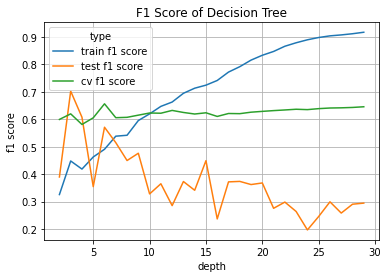

In [3]:
results = []
# iterate max_depth with class_weight, min_samples_split from above randomizedsearchcv result
for depth in tqdm(range(2, 30)):
    clf = DecisionTreeClassifier(max_depth=depth, class_weight = "balanced", min_samples_split=5)
    clf.fit(x_train, y_train)
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)
    # get f1 score of train and test
    f1_test = f1_score(y_test_pred, y_test)
    f1_train = f1_score(y_train_pred, y_train)
    cv_f1 = np.mean(cross_val_score(clf, x_train, y_train, cv=10))
    # melt result and store them in results
    results.append([depth, f1_train, f1_test, cv_f1])

results = pd.DataFrame(
    data=results,
    columns=['depth', 'train f1 score', 'test f1 score', 'cv f1 score'],
)

results = pd.melt(
    results,
    id_vars=['depth'],
    var_name='type',
    value_name='f1 score'
)  # Melt dataframe for easier plotting

# plot f1 score of train, test, cv in one plot
sns.lineplot(
    x='depth',
    y='f1 score',
    hue='type',
    data=results,
)
plt.grid()
plt.title("F1 Score of Decision Tree")

0.5706806282722513


Text(0.5, 1.0, 'Feature Importances')

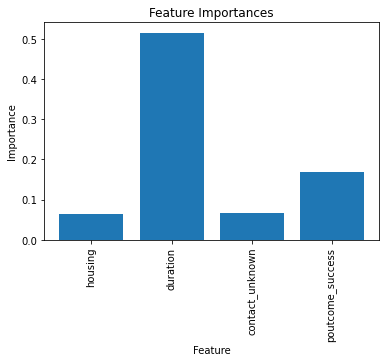

In [4]:
# fit the model with the best estimators
DT = DecisionTreeClassifier(max_depth=6, class_weight = "balanced")
DT.fit(x_train, y_train)

# Get importance of decision tree result
importances = DT.feature_importances_
features_list = x_train.columns
print(f1_score(DT.predict(x_test), y_test))

# Get features with importances greater than 0.05
important_features = importances>=0.05
important_feature_list = features_list[important_features]
important_feature_importance = importances[important_features]
x_values = list(range(len(important_feature_list)))

# bar plot of feature importances
plt.bar(important_feature_list, important_feature_importance, orientation = 'vertical')
plt.xticks(x_values, important_feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importances')